In [1]:
# Importing dependencies
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# For linear regression
import statsmodels.formula.api as smf

### Loading the Dataset

In [2]:
# Loading the dataset into pandas dataframe
path = "../data/census-income.data.gz"
censusColnames = ['Age', 'ClassOfWorker', 'Industry', 'Occupation', 'Education',
                  'WagePerHr', 'EducationalInst', 'MaritalStatus', 'IndustryCode', 
                  'OccupationCode', 'Race', 'HispanicOrigin', 'Sex', 'MemLabourUnion',
                  'UnemploymentReason', 'EmploymentStatus', 'CapitalGain', 'CapitalLoss',
                  'Dividends', 'FEDERALTAX', 'TaxFilerStat', 'PrevState', 
                  'HouseholdStatus', 'HouseholdSummary', 'INSTANCEWEIGHT', 
                  'MigrationCode (MSA)', 'MigrationCode (REG)', 
                  'MigrationCode (WITHIN REG)', 'LiveInHouse', 
                  'MigrationPrevResInSunbelt', 'NumOfPersonForEmployer', 'Parent', 
                  'BirthCountryFather', 'BirthCountryMother', 'BirthCountrySelf', 
                  'Citizenship', 'OwnBusiness', 'VeteranQA', 'VeteranBenefits', 
                  'WeeksWorked', 'Year', 'Income']
censusDf = pd.read_csv(path, sep=r',', skipinitialspace=True, 
                       names = censusColnames, header='infer')

# Printing the dimensions of the dataset
print(censusDf.shape[0],"rows,", censusDf.shape[1],"columns")

# Displaying first five elements of all columns
with pd.option_context('display.max_columns', None):
    display(censusDf.head())

199523 rows, 42 columns


,Age,ClassOfWorker,Industry,Occupation,Education,WagePerHr,EducationalInst,MaritalStatus,IndustryCode,OccupationCode,Race,HispanicOrigin,Sex,MemLabourUnion,UnemploymentReason,EmploymentStatus,CapitalGain,CapitalLoss,Dividends,FEDERALTAX,TaxFilerStat,PrevState,HouseholdStatus,HouseholdSummary,INSTANCEWEIGHT,MigrationCode (MSA),MigrationCode (REG),MigrationCode (WITHIN REG),LiveInHouse,MigrationPrevResInSunbelt,NumOfPersonForEmployer,Parent,BirthCountryFather,BirthCountryMother,BirthCountrySelf,Citizenship,OwnBusiness,VeteranQA,VeteranBenefits,WeeksWorked,Year,Income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Wrangling

In [3]:
# Continuous Features
ordinalFeatures = ['Age', 'WagePerHr', 'CapitalGain', 'CapitalLoss','Dividends', 
     'INSTANCEWEIGHT', 'NumOfPersonForEmployer', 'WeeksWorked']

# Nominal Features
nominalFeatures = ['ClassOfWorker', 'Industry', 'Occupation', 'Education', 
                  'EducationalInst', 'MaritalStatus', 'IndustryCode', 'OccupationCode',
                  'Race', 'HispanicOrigin', 'Sex', 'MemLabourUnion', 
                  'UnemploymentReason', 'EmploymentStatus','FEDERALTAX', 
                   'TaxFilerStat', 'PrevState', 'HouseholdStatus', 
                  'HouseholdSummary', 'MigrationCode (MSA)', 'MigrationCode (REG)', 
                  'MigrationCode (WITHIN REG)', 'LiveInHouse', 'MigrationPrevResInSunbelt',
                  'Parent', 'BirthCountryFather', 'BirthCountryMother',
                  'BirthCountrySelf', 'Citizenship', 'OwnBusiness', 'VeteranQA', 'VeteranBenefits', 
                  'Year', 'Income']

# Check the features
print(len(censusColnames) == len(ordinalFeatures) + len(nominalFeatures))

True


### Missing Values

In [4]:
# Dropping the columns with missing values more than 50% and storing in a new dataframe
censusDf_cleaned = censusDf.drop(['MigrationCode (MSA)', 'MigrationCode (REG)', 
                                  'MigrationCode (WITHIN REG)', 
                                  'MigrationPrevResInSunbelt'], axis=1)

# Replacing the '?' with the label 'Unavailable'
censusDf_cleaned = censusDf_cleaned.replace('?', 'Unavailable')

### Feature Engineering

In [5]:
# Replacing the income values with dummy variables
# - 50000. as the baseline. 0 for - 50000. and 1 for 50000+.
censusDf_cleaned['Income'] = pd.get_dummies(censusDf_cleaned.Income).iloc[:,1:]

## Plots

In [6]:
# getting the count of unique features
def create_countplot(feature_name, plot_title, x_label, y_label):
    """
    Creates a count plot of the frature passed.
    
    Prams:
        feature_name.........The column name from the dataframe (string)
        plot_title...........Title of the plot (string)
        x_label..............x label of the plot (string)
        y_label..............y label of the plot (string)
        
    Returns:
        dict.....Mapping the value to the counts
        fig......A count plot of the unique values present in the 
                 column of the dataframe
    """
    
    value_count = censusDf_cleaned[feature_name].value_counts()
    fig = sns.barplot(x=value_count.index, y=value_count, data=censusDf_cleaned);
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=14)
    plt.title(plot_title, fontsize=12)
    plt.xticks(rotation=75)
    plt.rcParams["figure.figsize"] = [16,9]
    print(dict(value_count))
    return fig
    
    

***

In [7]:
a = ['ClassOfWorker', 'Education',
       'EducationalInst', 'MaritalStatus', 'IndustryCode',
       'OccupationCode', 'Race', 'HispanicOrigin', 'Sex', 'MemLabourUnion',
       'UnemploymentReason', 'EmploymentStatus','FEDERALTAX',
       'TaxFilerStat', 'PrevState',
       'HouseholdStatus', 'HouseholdSummary', 'LiveInHouse',
       'Parent', 'BirthCountryFather',
       'BirthCountryMother', 'BirthCountrySelf', 'Citizenship',
       'VeteranQA', 'Year', 'Income']
    

{'Not in universe': 100245, 'Private': 72028, 'Self-employed-not incorporated': 8445, 'Local government': 7784, 'State government': 4227, 'Self-employed-incorporated': 3265, 'Federal government': 2925, 'Never worked': 439, 'Without pay': 165}


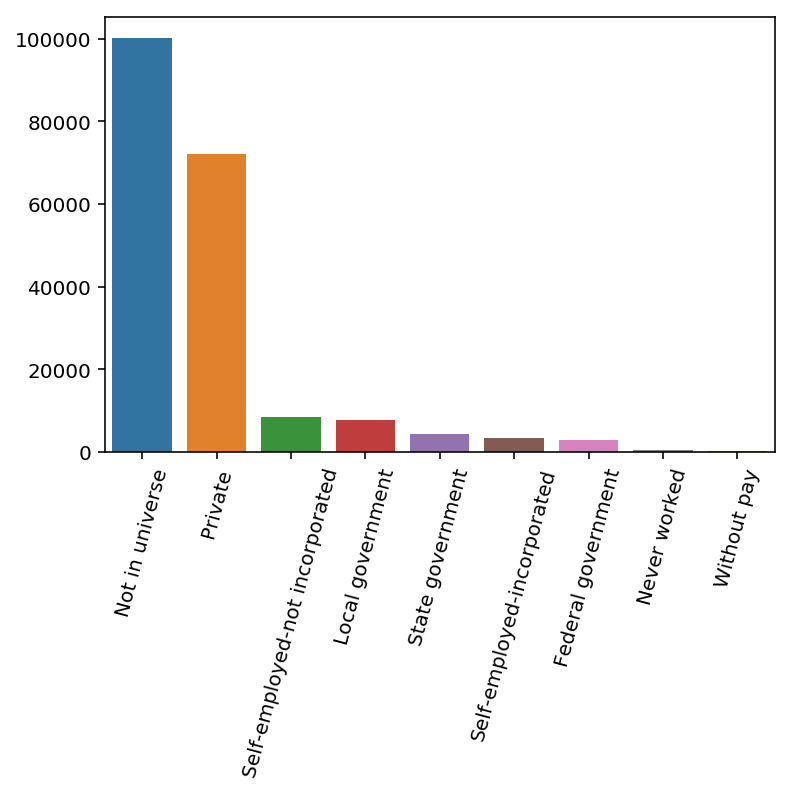

In [8]:
create_countplot('ClassOfWorker','','','')

{'High school graduate': 48407, 'Children': 47422, 'Some college but no degree': 27820, 'Bachelors degree(BA AB BS)': 19865, '7th and 8th grade': 8007, '10th grade': 7557, '11th grade': 6876, 'Masters degree(MA MS MEng MEd MSW MBA)': 6541, '9th grade': 6230, 'Associates degree-occup /vocational': 5358, 'Associates degree-academic program': 4363, '5th or 6th grade': 3277, '12th grade no diploma': 2126, '1st 2nd 3rd or 4th grade': 1799, 'Prof school degree (MD DDS DVM LLB JD)': 1793, 'Doctorate degree(PhD EdD)': 1263, 'Less than 1st grade': 819}


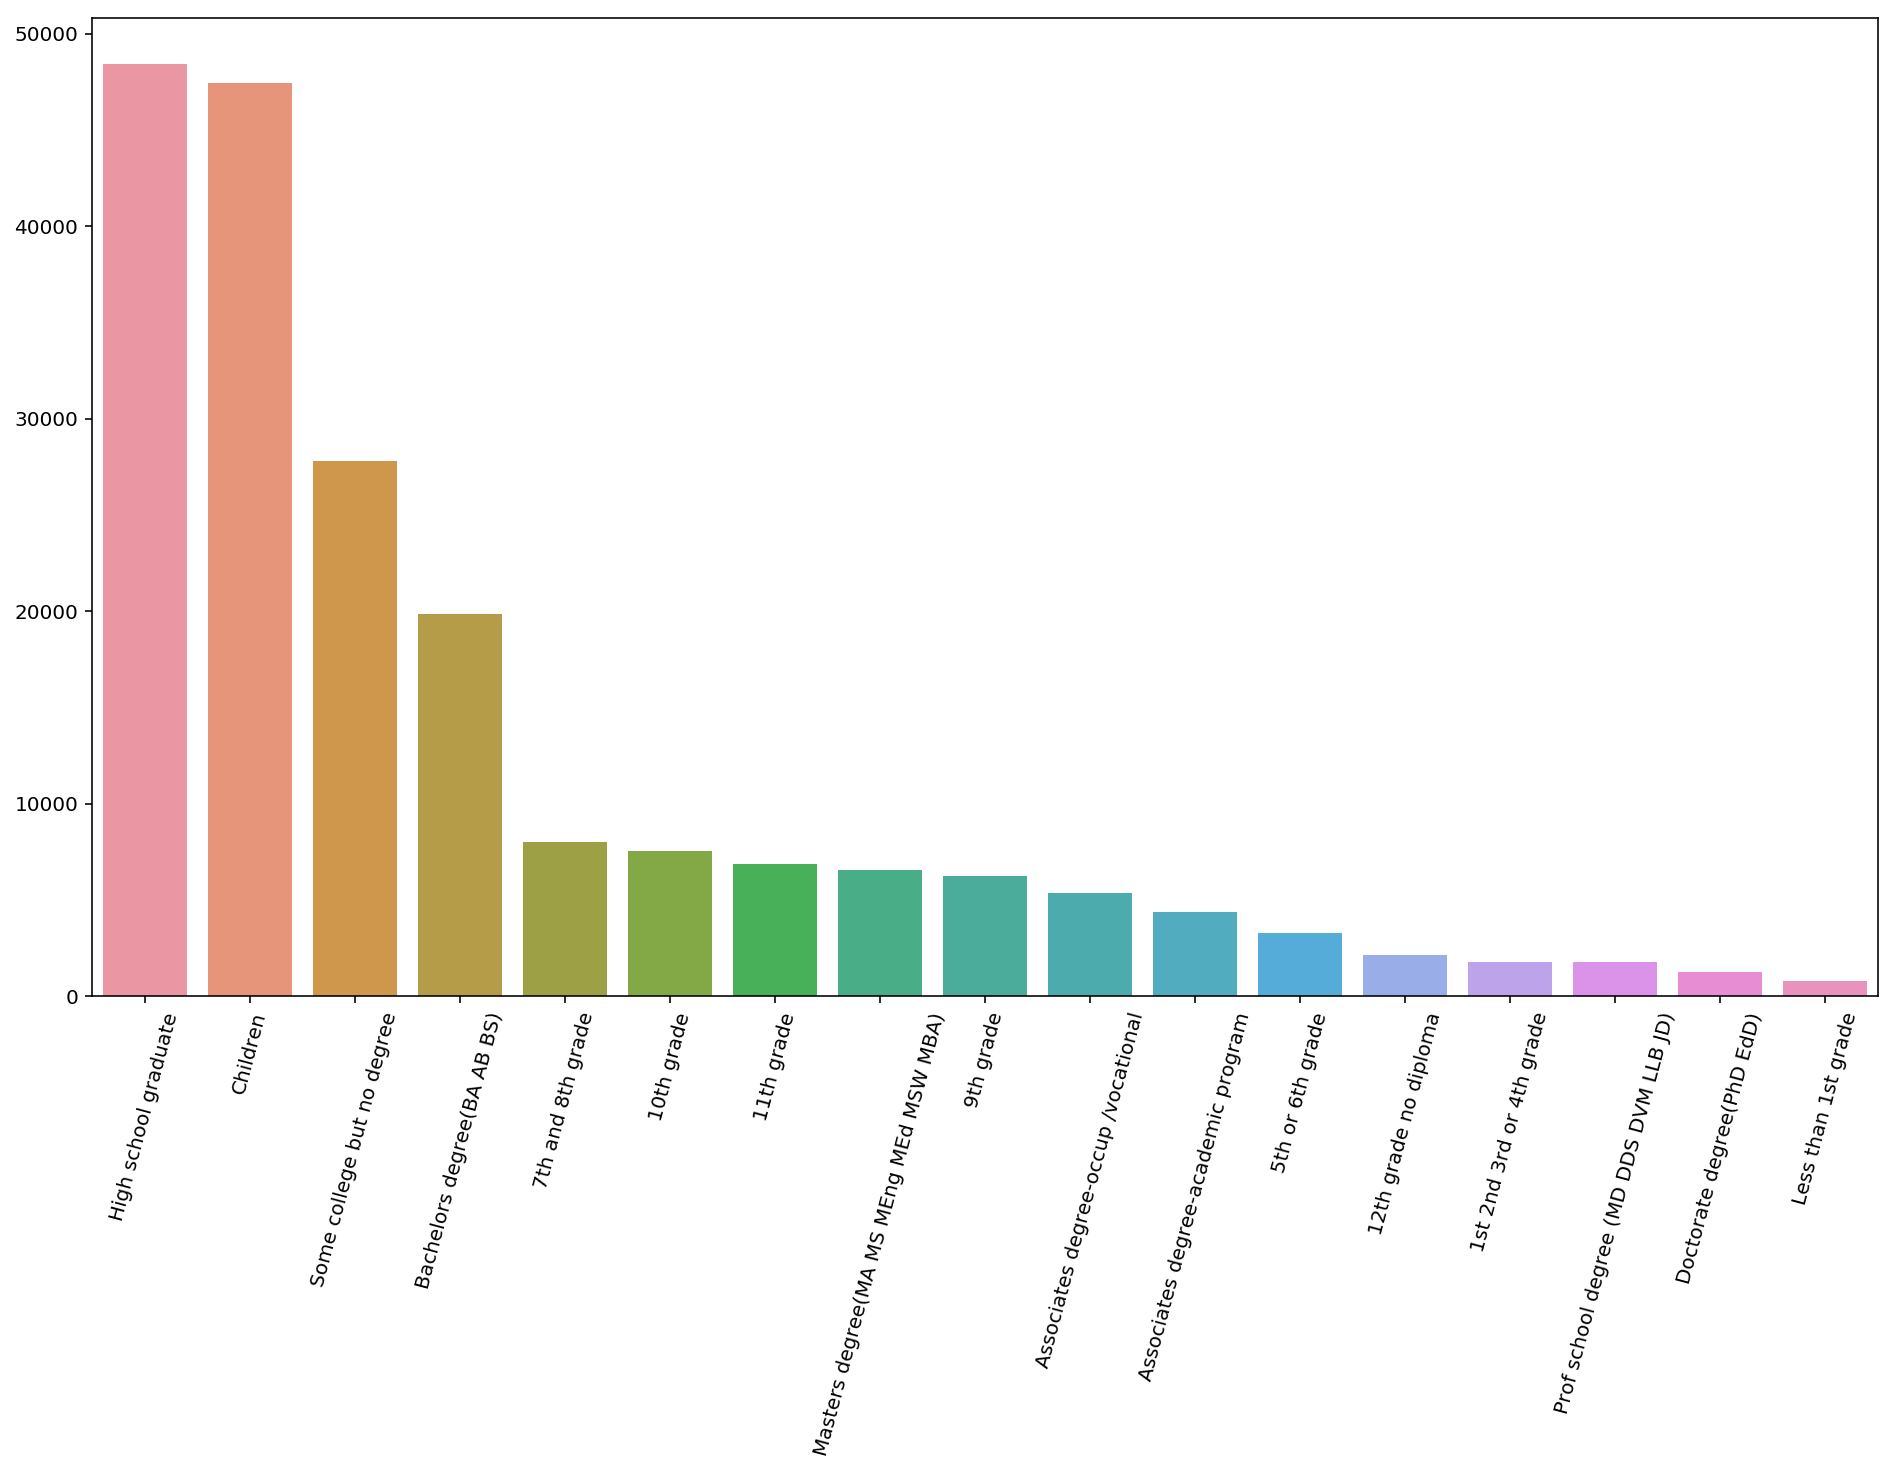

In [9]:
create_countplot('Education','','','')

{'Not in universe': 186943, 'High school': 6892, 'College or university': 5688}


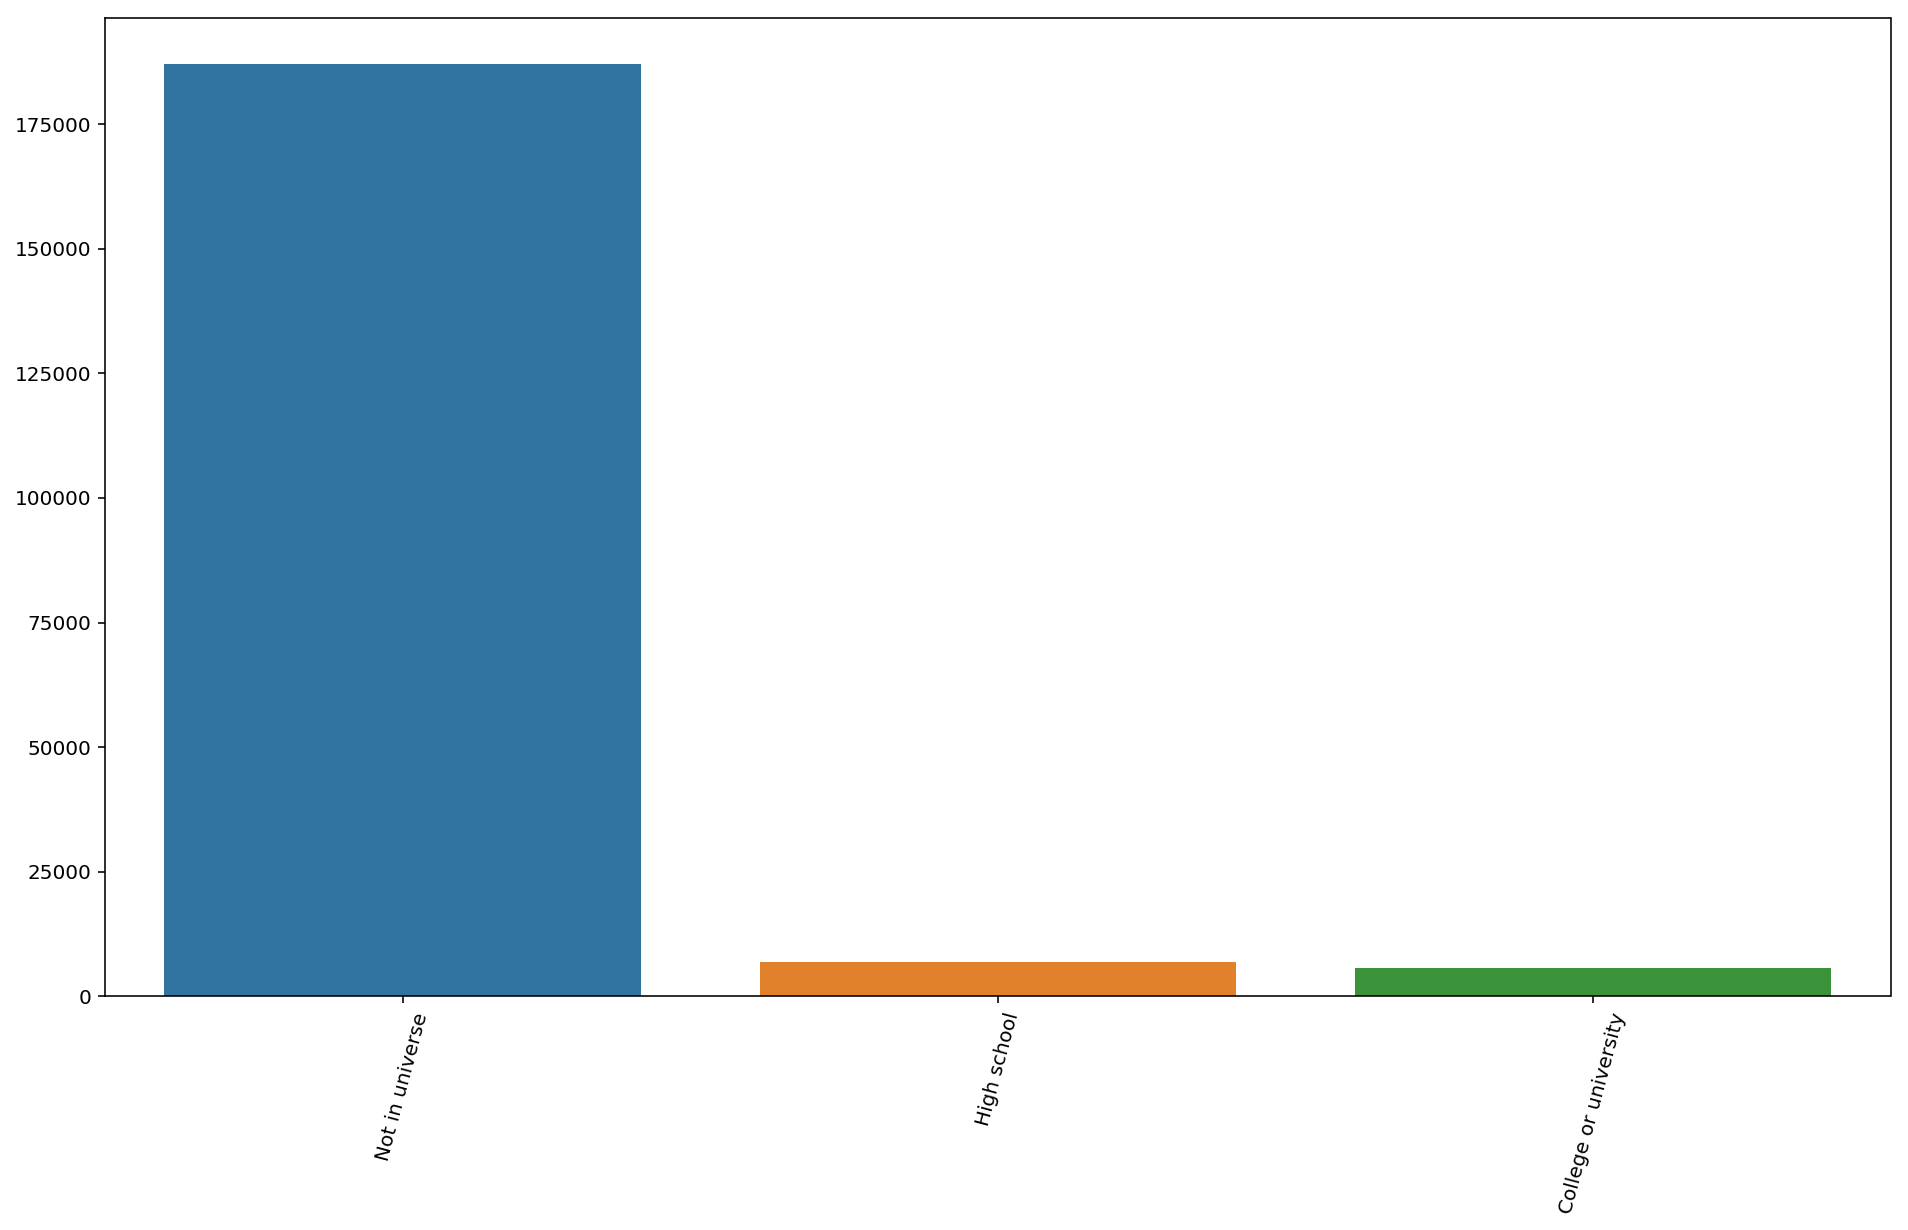

In [10]:
create_countplot('EducationalInst','','','')

{'Never married': 86485, 'Married-civilian spouse present': 84222, 'Divorced': 12710, 'Widowed': 10463, 'Separated': 3460, 'Married-spouse absent': 1518, 'Married-A F spouse present': 665}


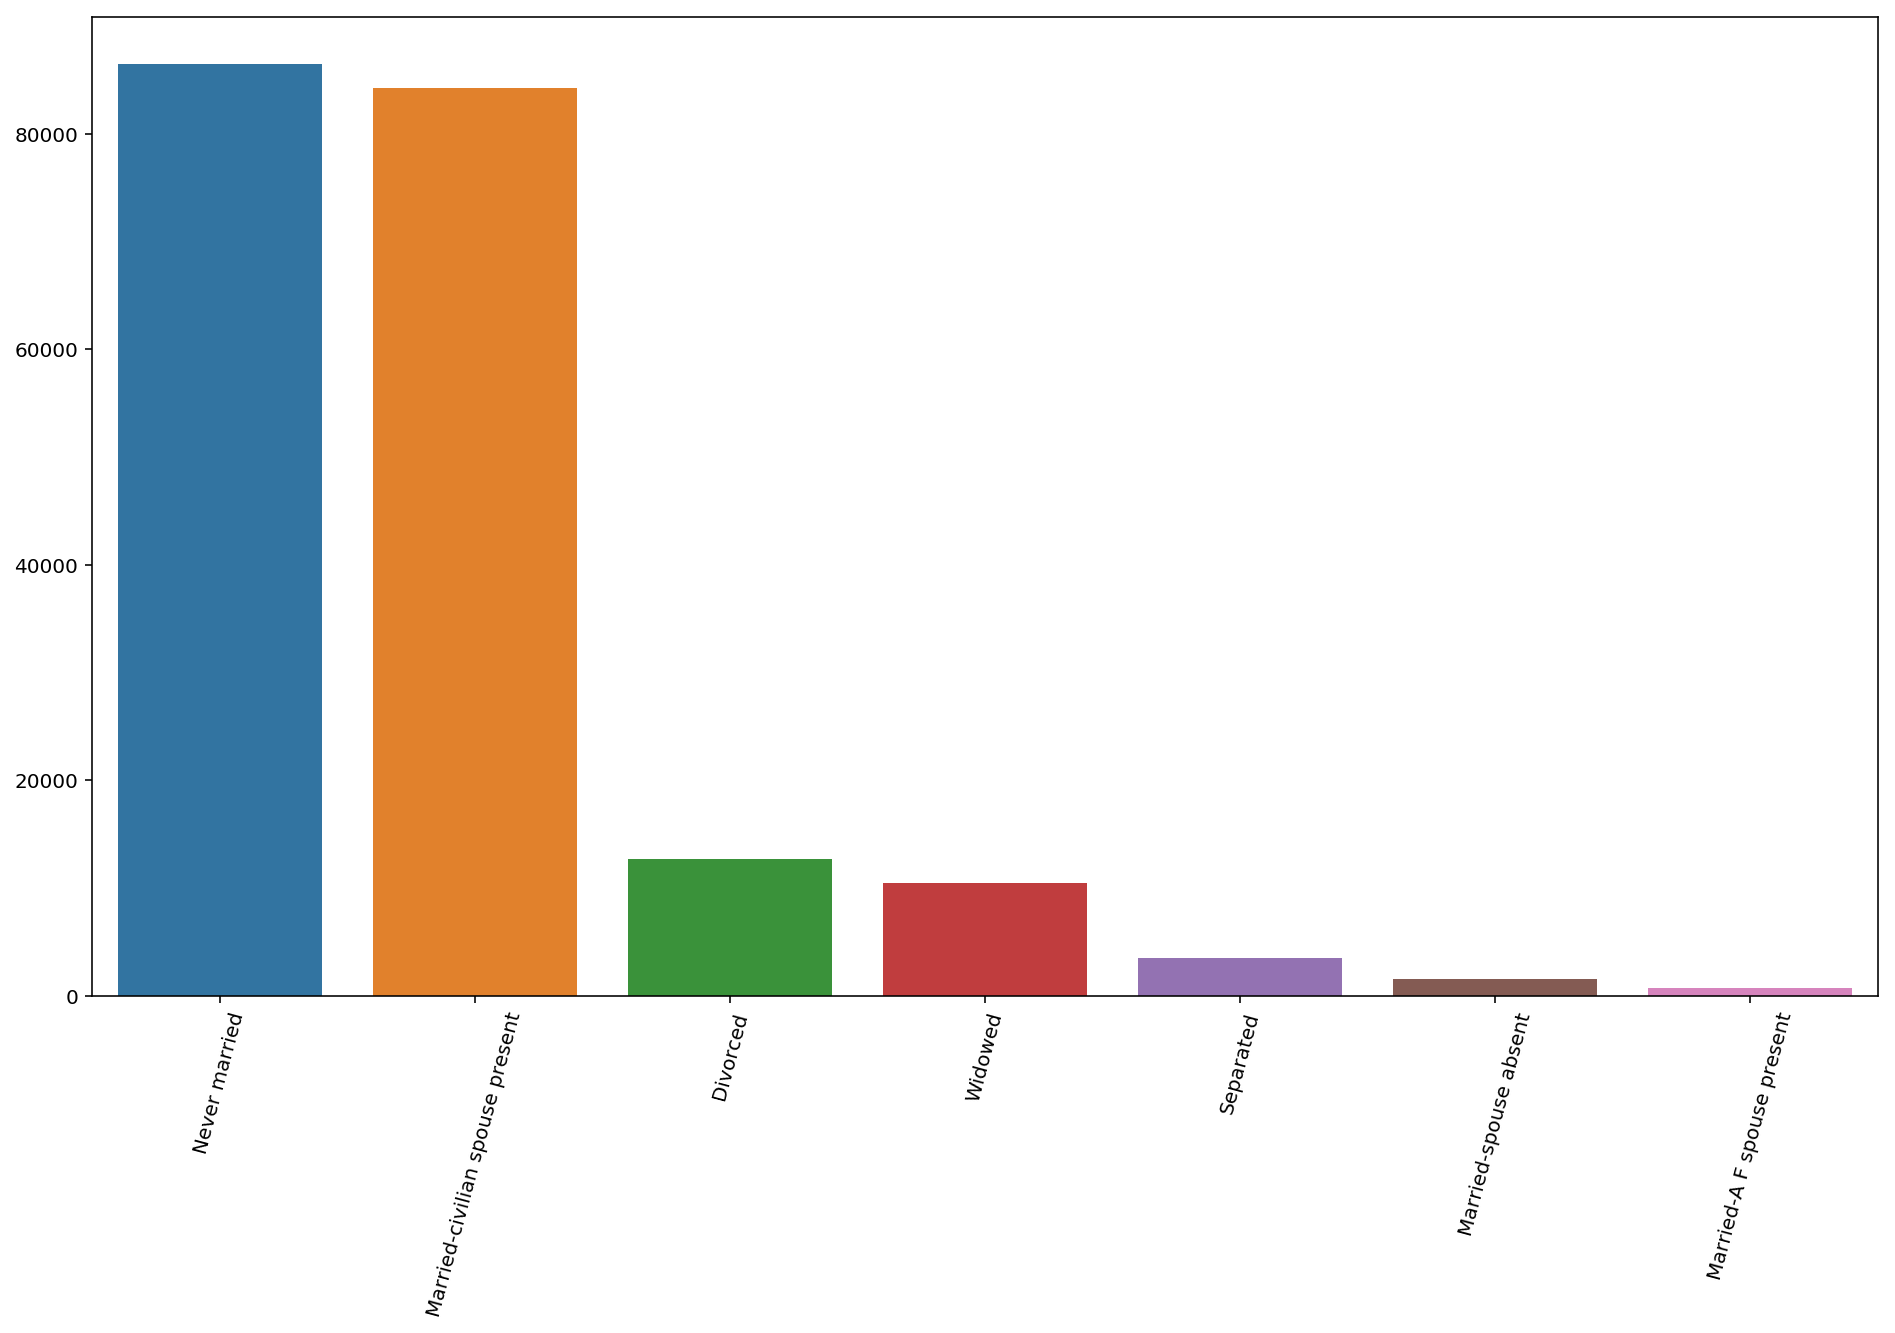

In [11]:
create_countplot('MaritalStatus','','','')

{'Not in universe or children': 100684, 'Retail trade': 17070, 'Manufacturing-durable goods': 9015, 'Education': 8283, 'Manufacturing-nondurable goods': 6897, 'Finance insurance and real estate': 6145, 'Construction': 5984, 'Business and repair services': 5651, 'Medical except hospital': 4683, 'Public administration': 4610, 'Other professional services': 4482, 'Transportation': 4209, 'Hospital services': 3964, 'Wholesale trade': 3596, 'Agriculture': 3023, 'Personal services except private HH': 2937, 'Social services': 2549, 'Entertainment': 1651, 'Communications': 1181, 'Utilities and sanitary services': 1178, 'Private household services': 945, 'Mining': 563, 'Forestry and fisheries': 187, 'Armed Forces': 36}


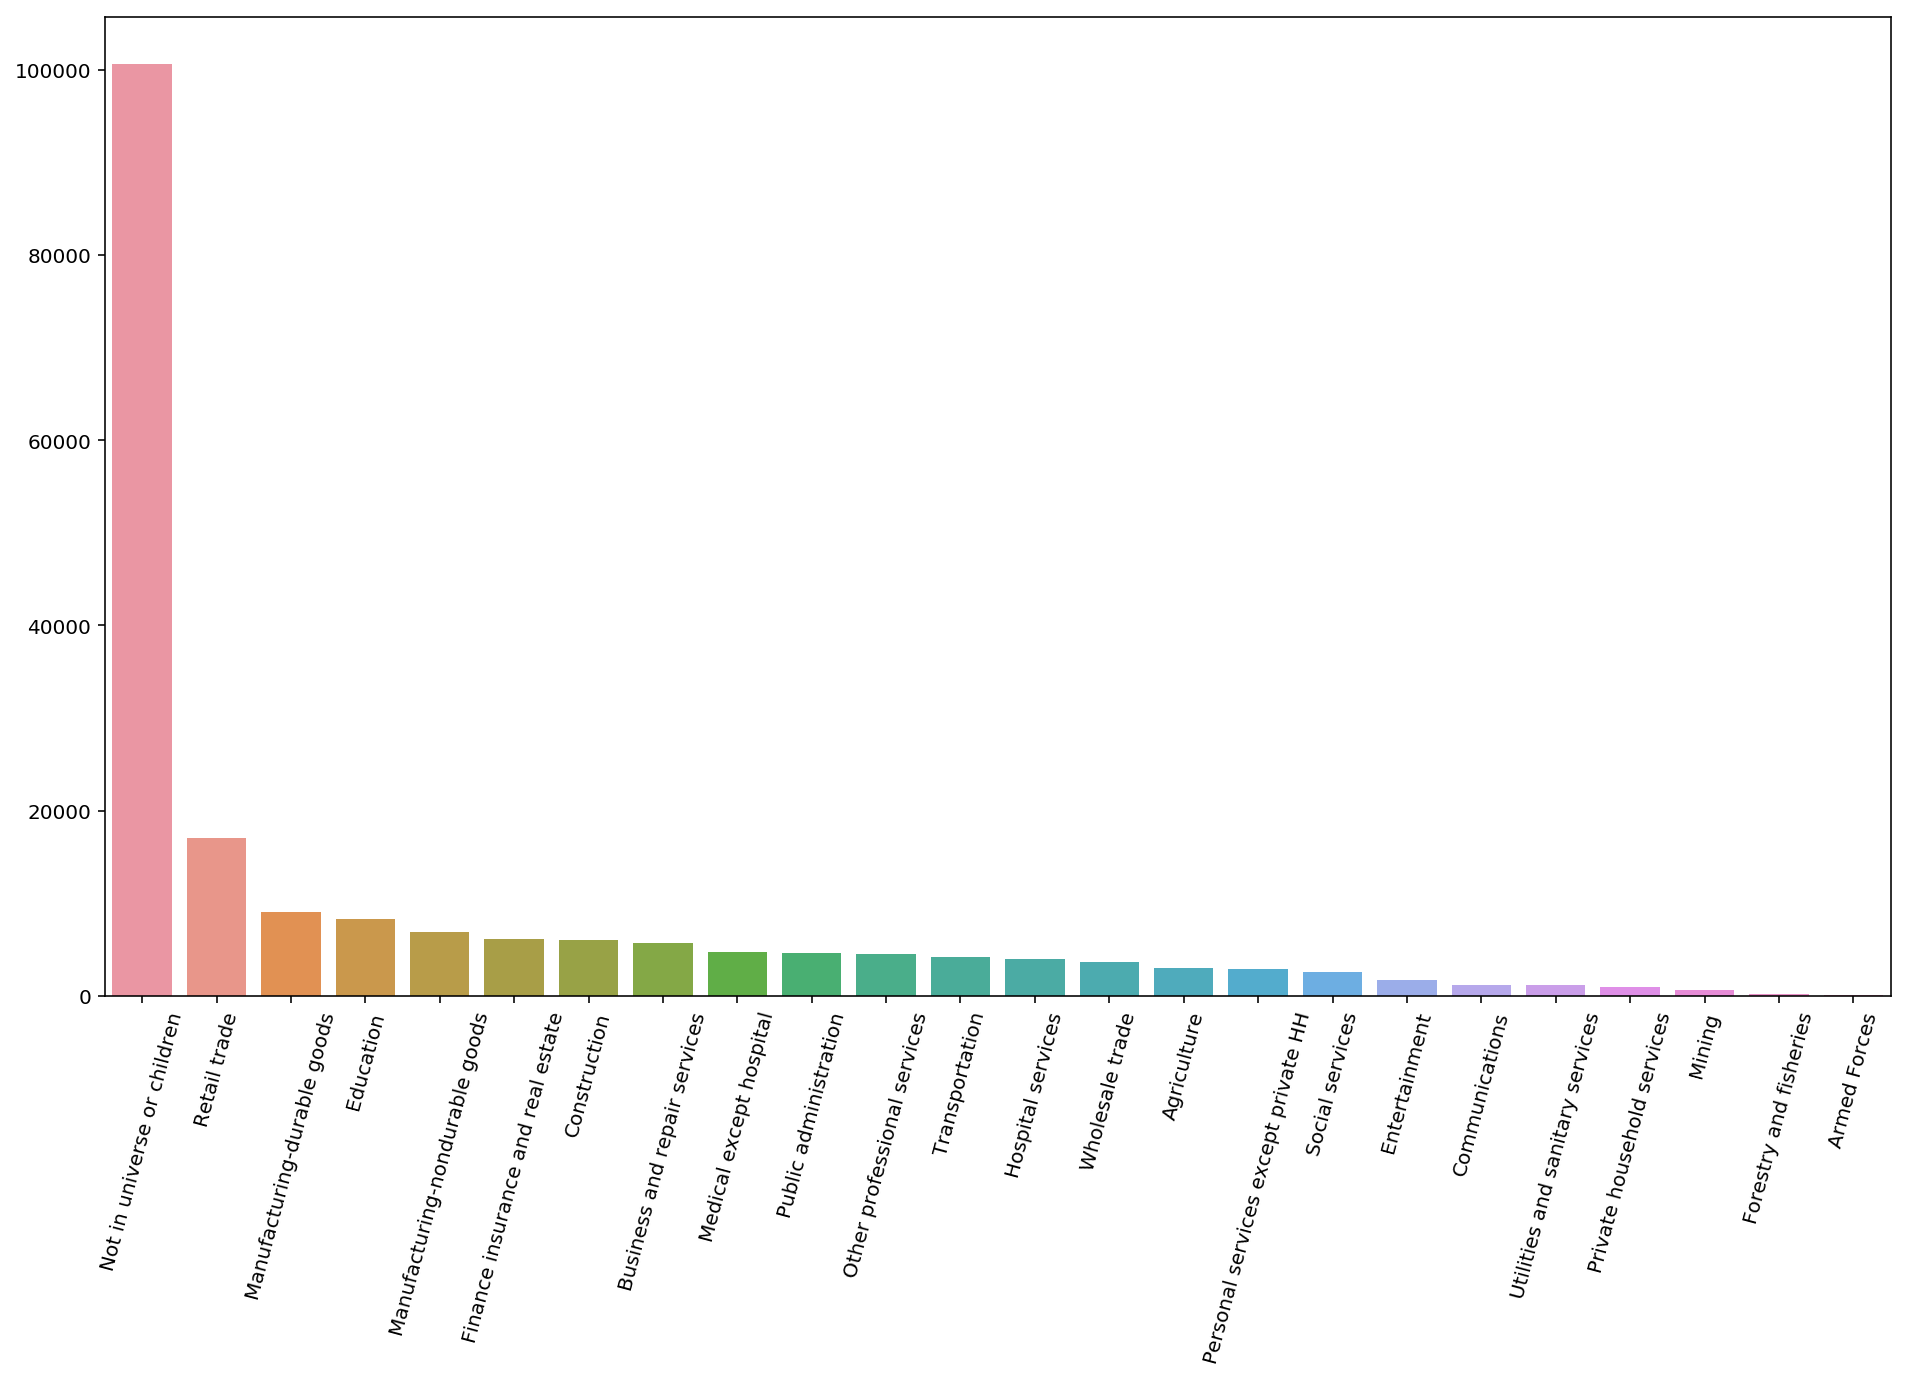

In [12]:
create_countplot('IndustryCode','','','')

{'Not in universe': 100684, 'Adm support including clerical': 14837, 'Professional specialty': 13940, 'Executive admin and managerial': 12495, 'Other service': 12099, 'Sales': 11783, 'Precision production craft & repair': 10518, 'Machine operators assmblrs & inspctrs': 6379, 'Handlers equip cleaners etc ': 4127, 'Transportation and material moving': 4020, 'Farming forestry and fishing': 3146, 'Technicians and related support': 3018, 'Protective services': 1661, 'Private household services': 780, 'Armed Forces': 36}


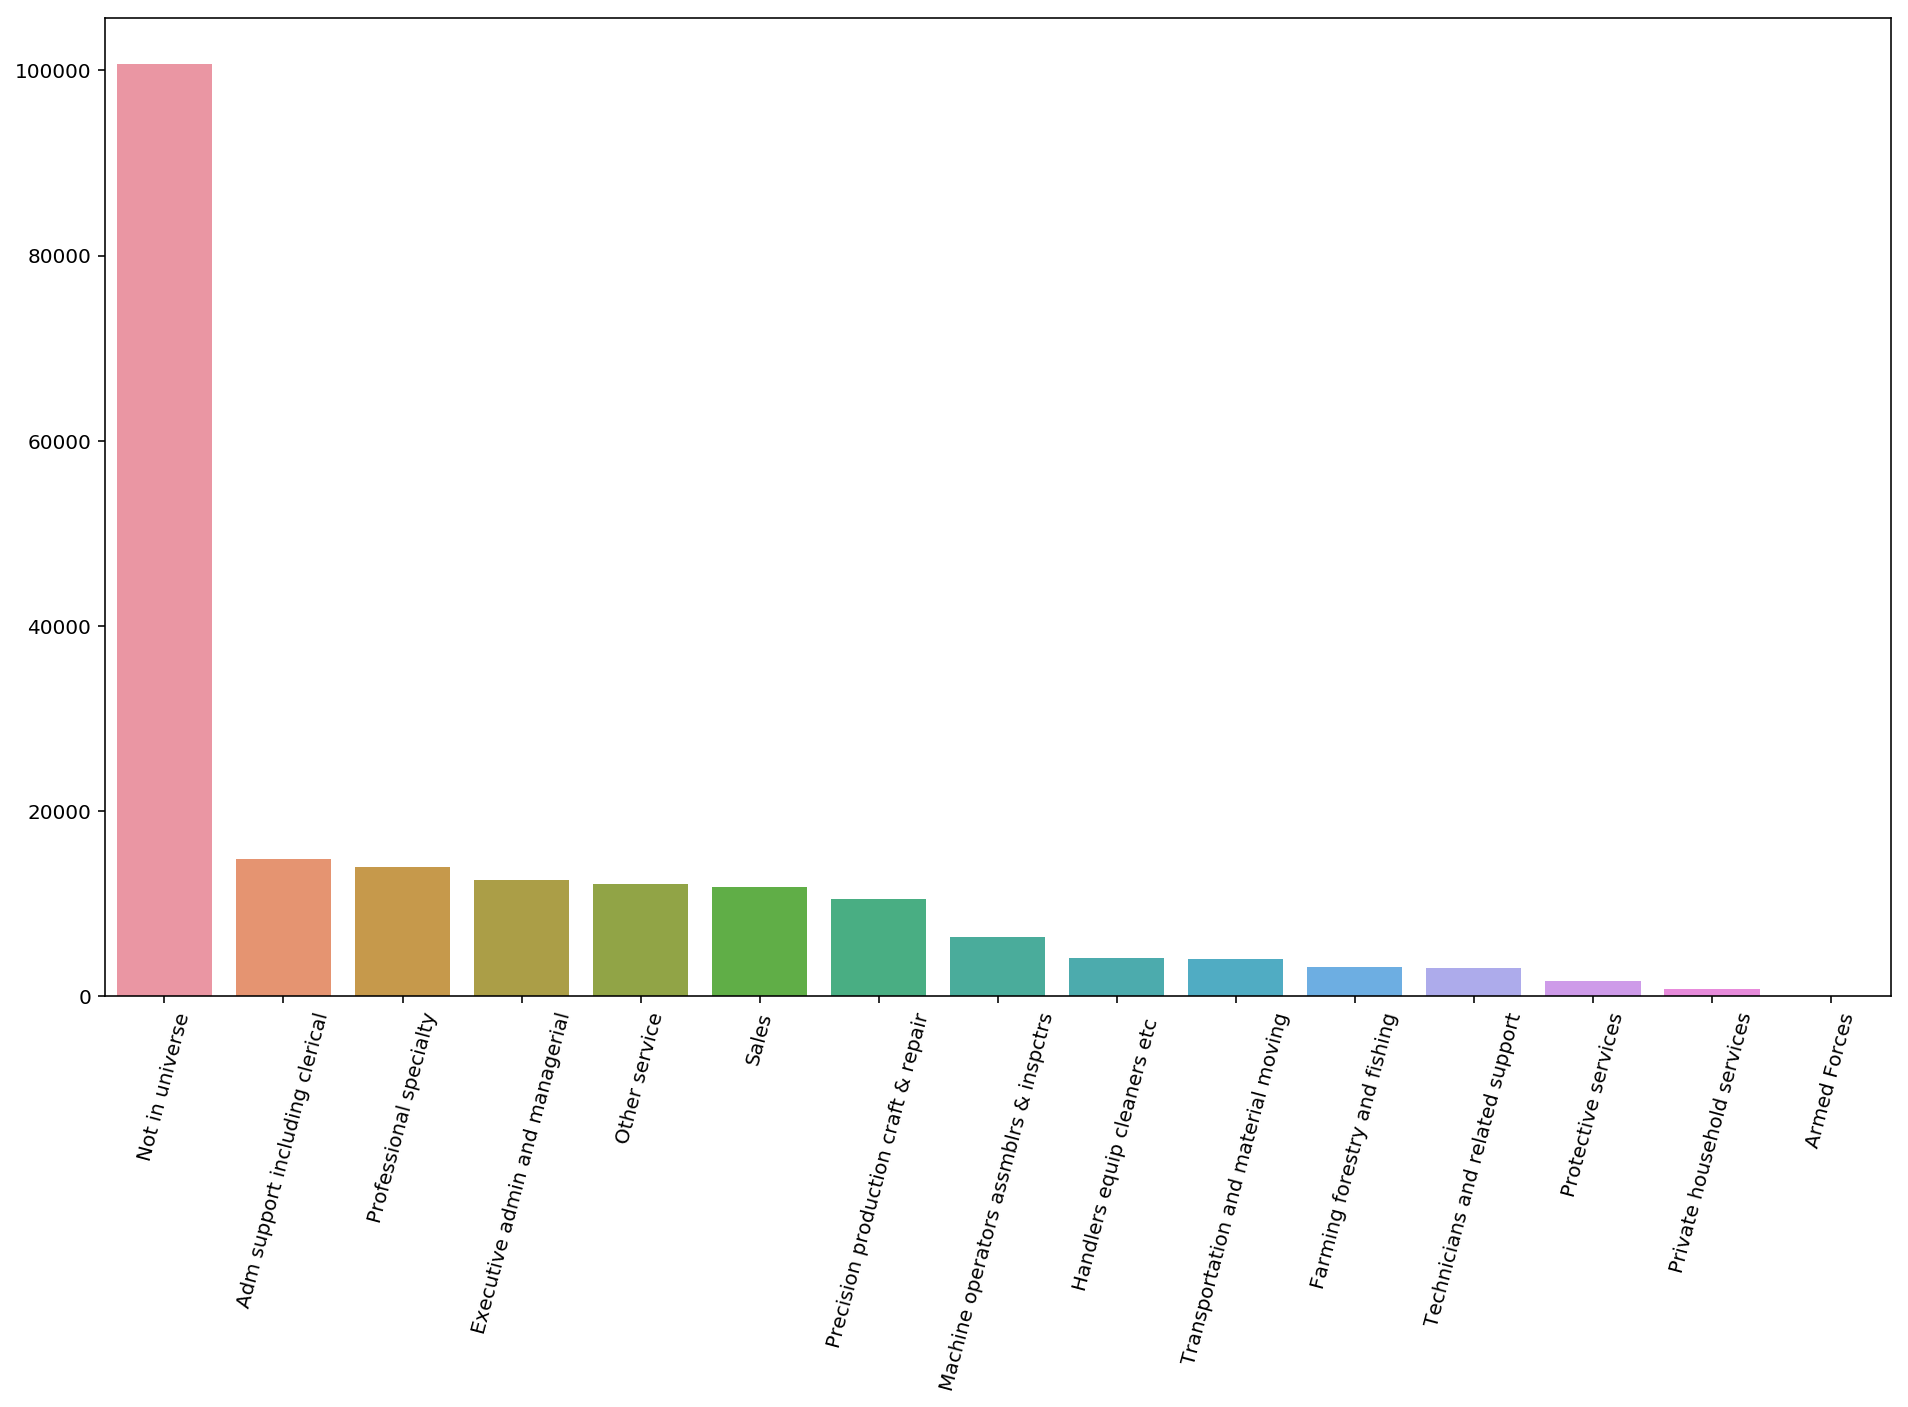

In [13]:
create_countplot('OccupationCode','','','')

{'White': 167365, 'Black': 20415, 'Asian or Pacific Islander': 5835, 'Other': 3657, 'Amer Indian Aleut or Eskimo': 2251}


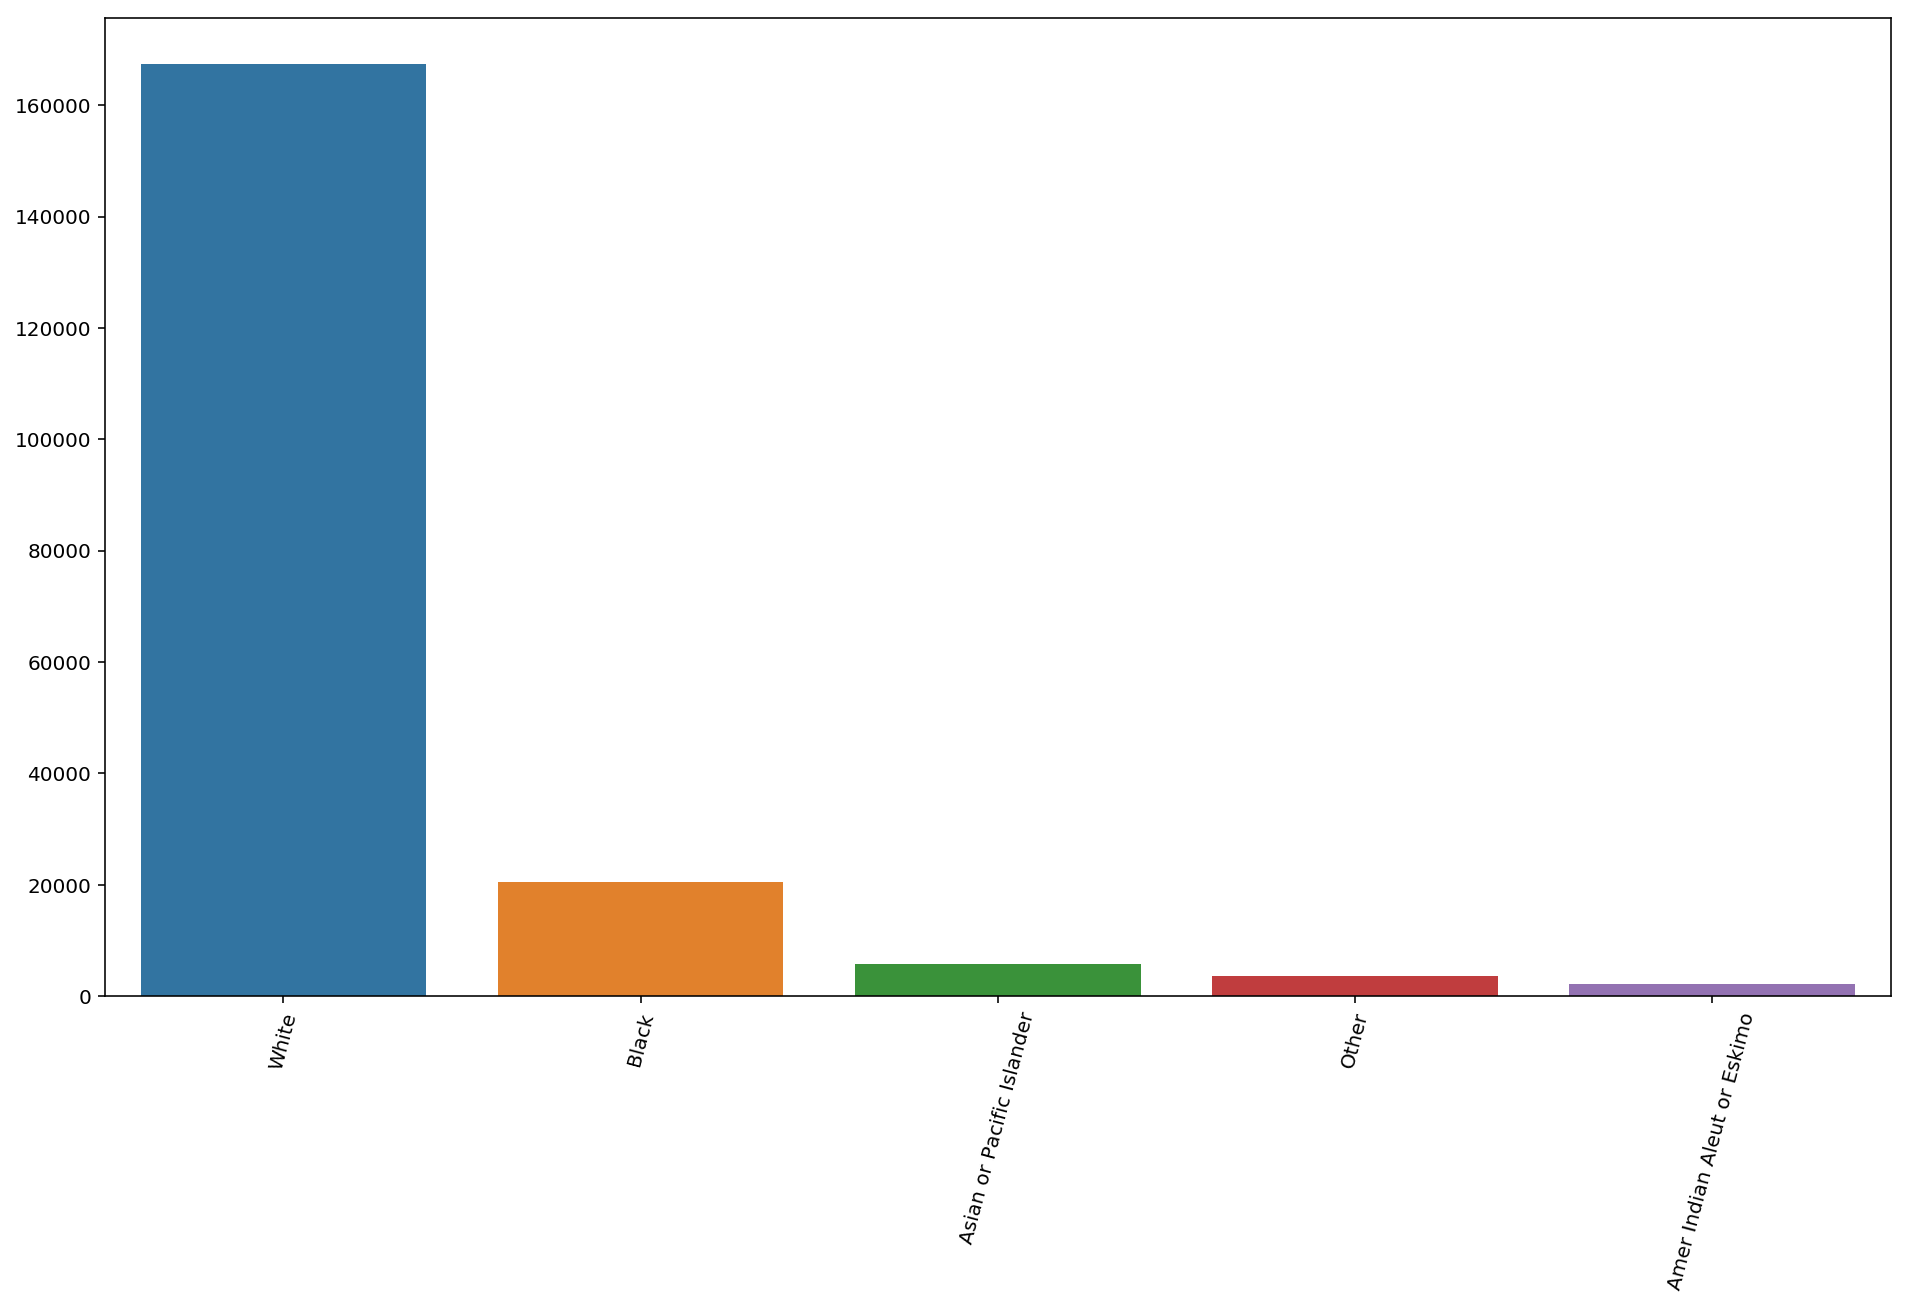

In [14]:
create_countplot('Race','','','')

{'All other': 171907, 'Mexican-American': 8079, 'Mexican (Mexicano)': 7234, 'Central or South American': 3895, 'Puerto Rican': 3313, 'Other Spanish': 2485, 'Cuban': 1126, 'Do not know': 306, 'Chicano': 304}


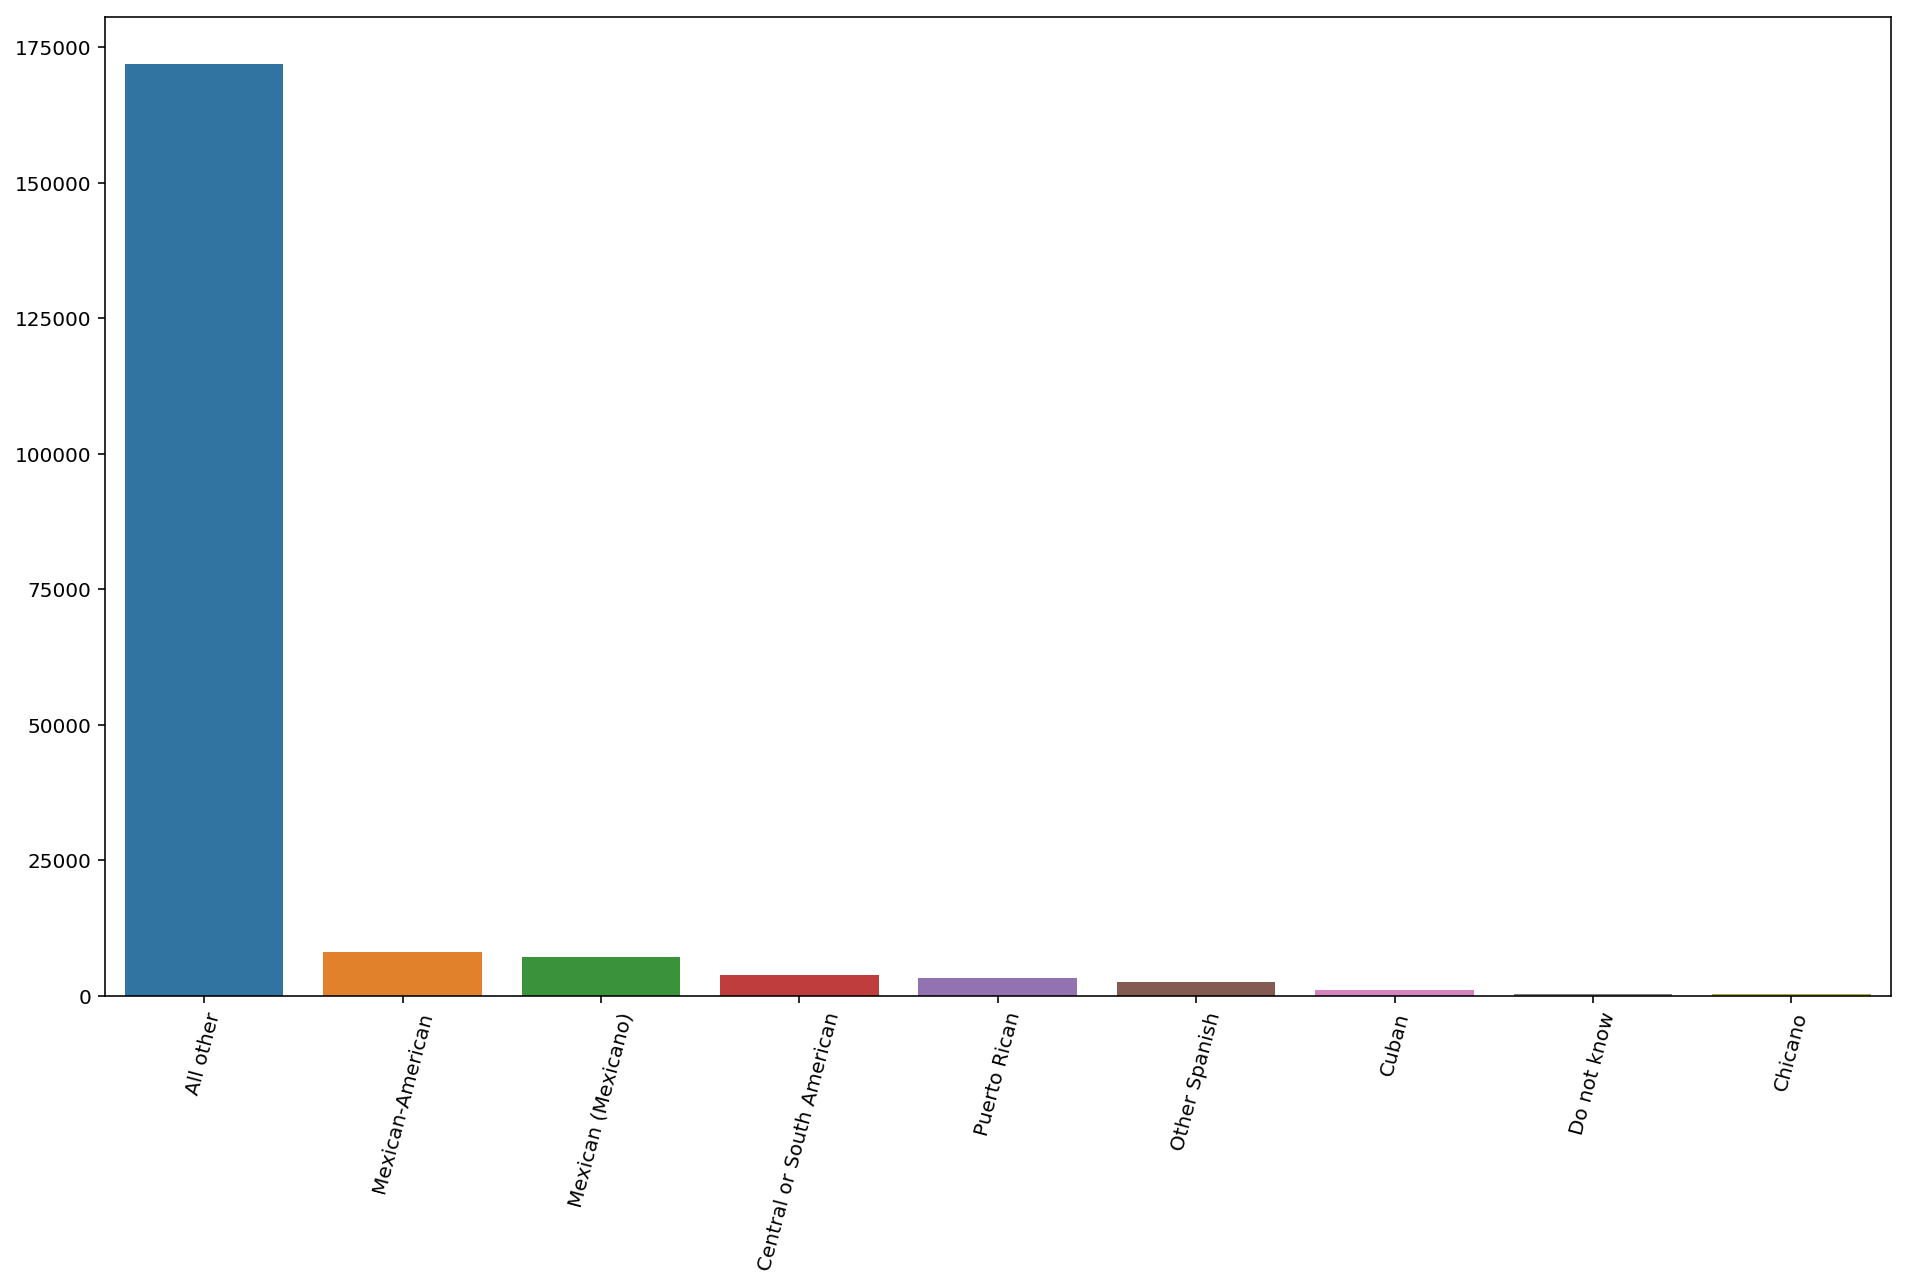

In [15]:
create_countplot('HispanicOrigin','','','')

{'Female': 103984, 'Male': 95539}


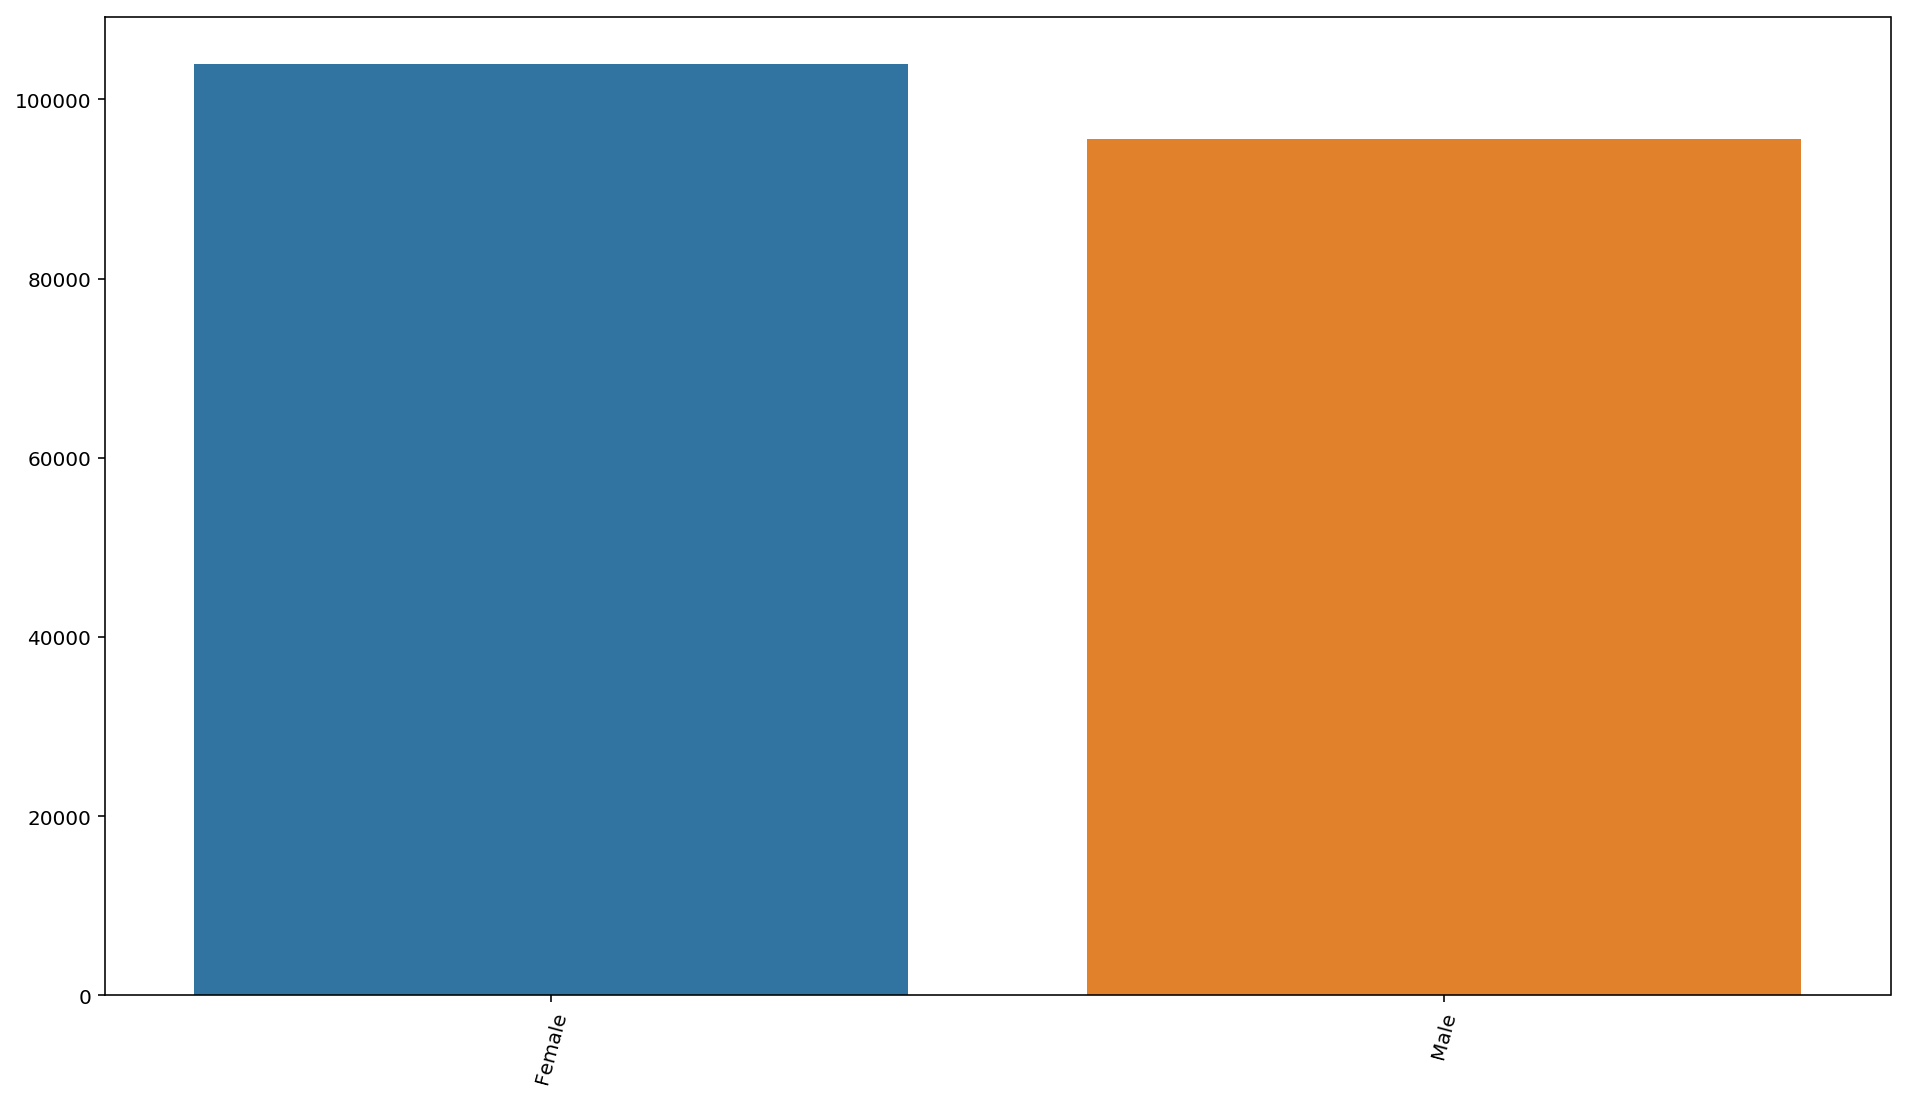

In [16]:
create_countplot('Sex','','','')

{'Not in universe': 180459, 'No': 16034, 'Yes': 3030}


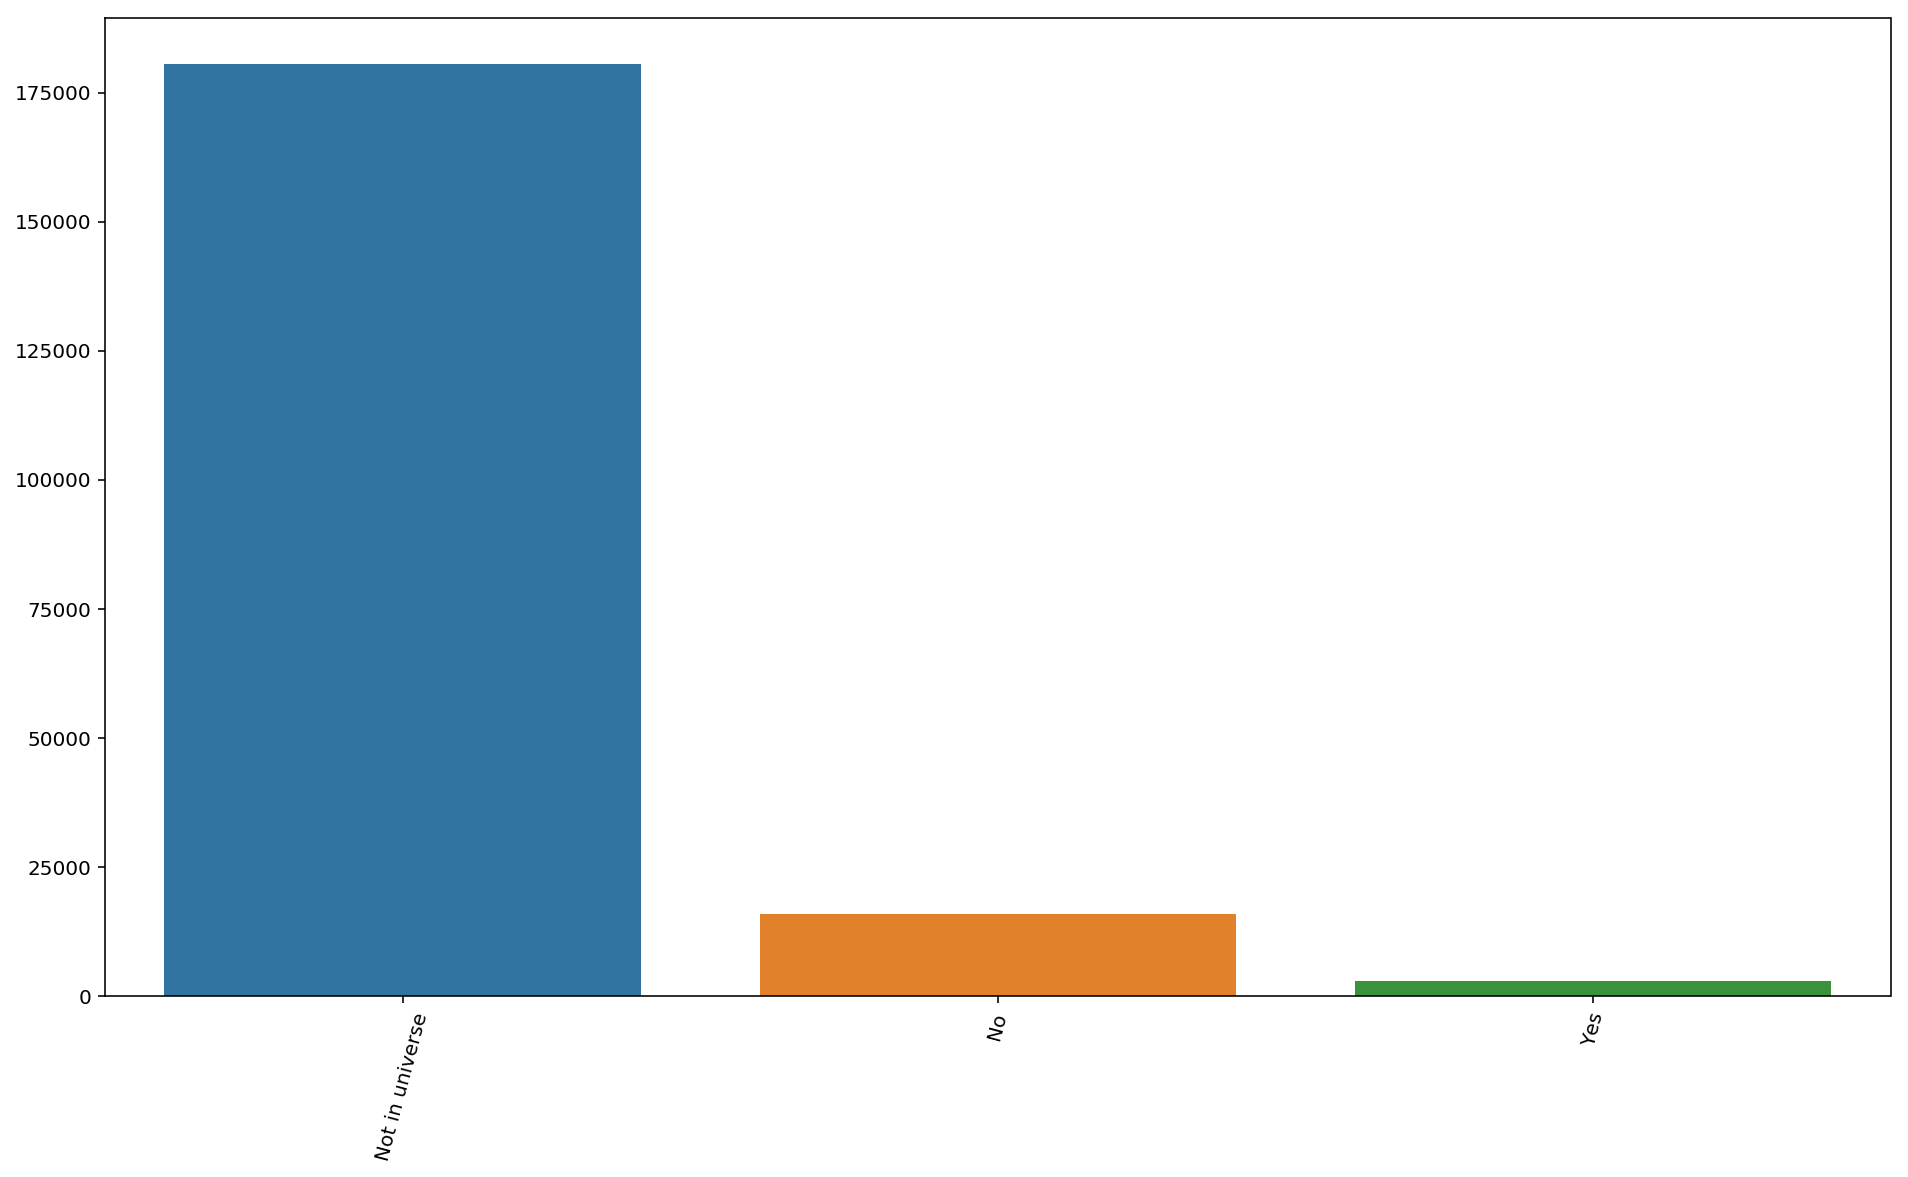

In [17]:
create_countplot('MemLabourUnion','','','')

{'Not in universe': 193453, 'Other job loser': 2038, 'Re-entrant': 2019, 'Job loser - on layoff': 976, 'Job leaver': 598, 'New entrant': 439}


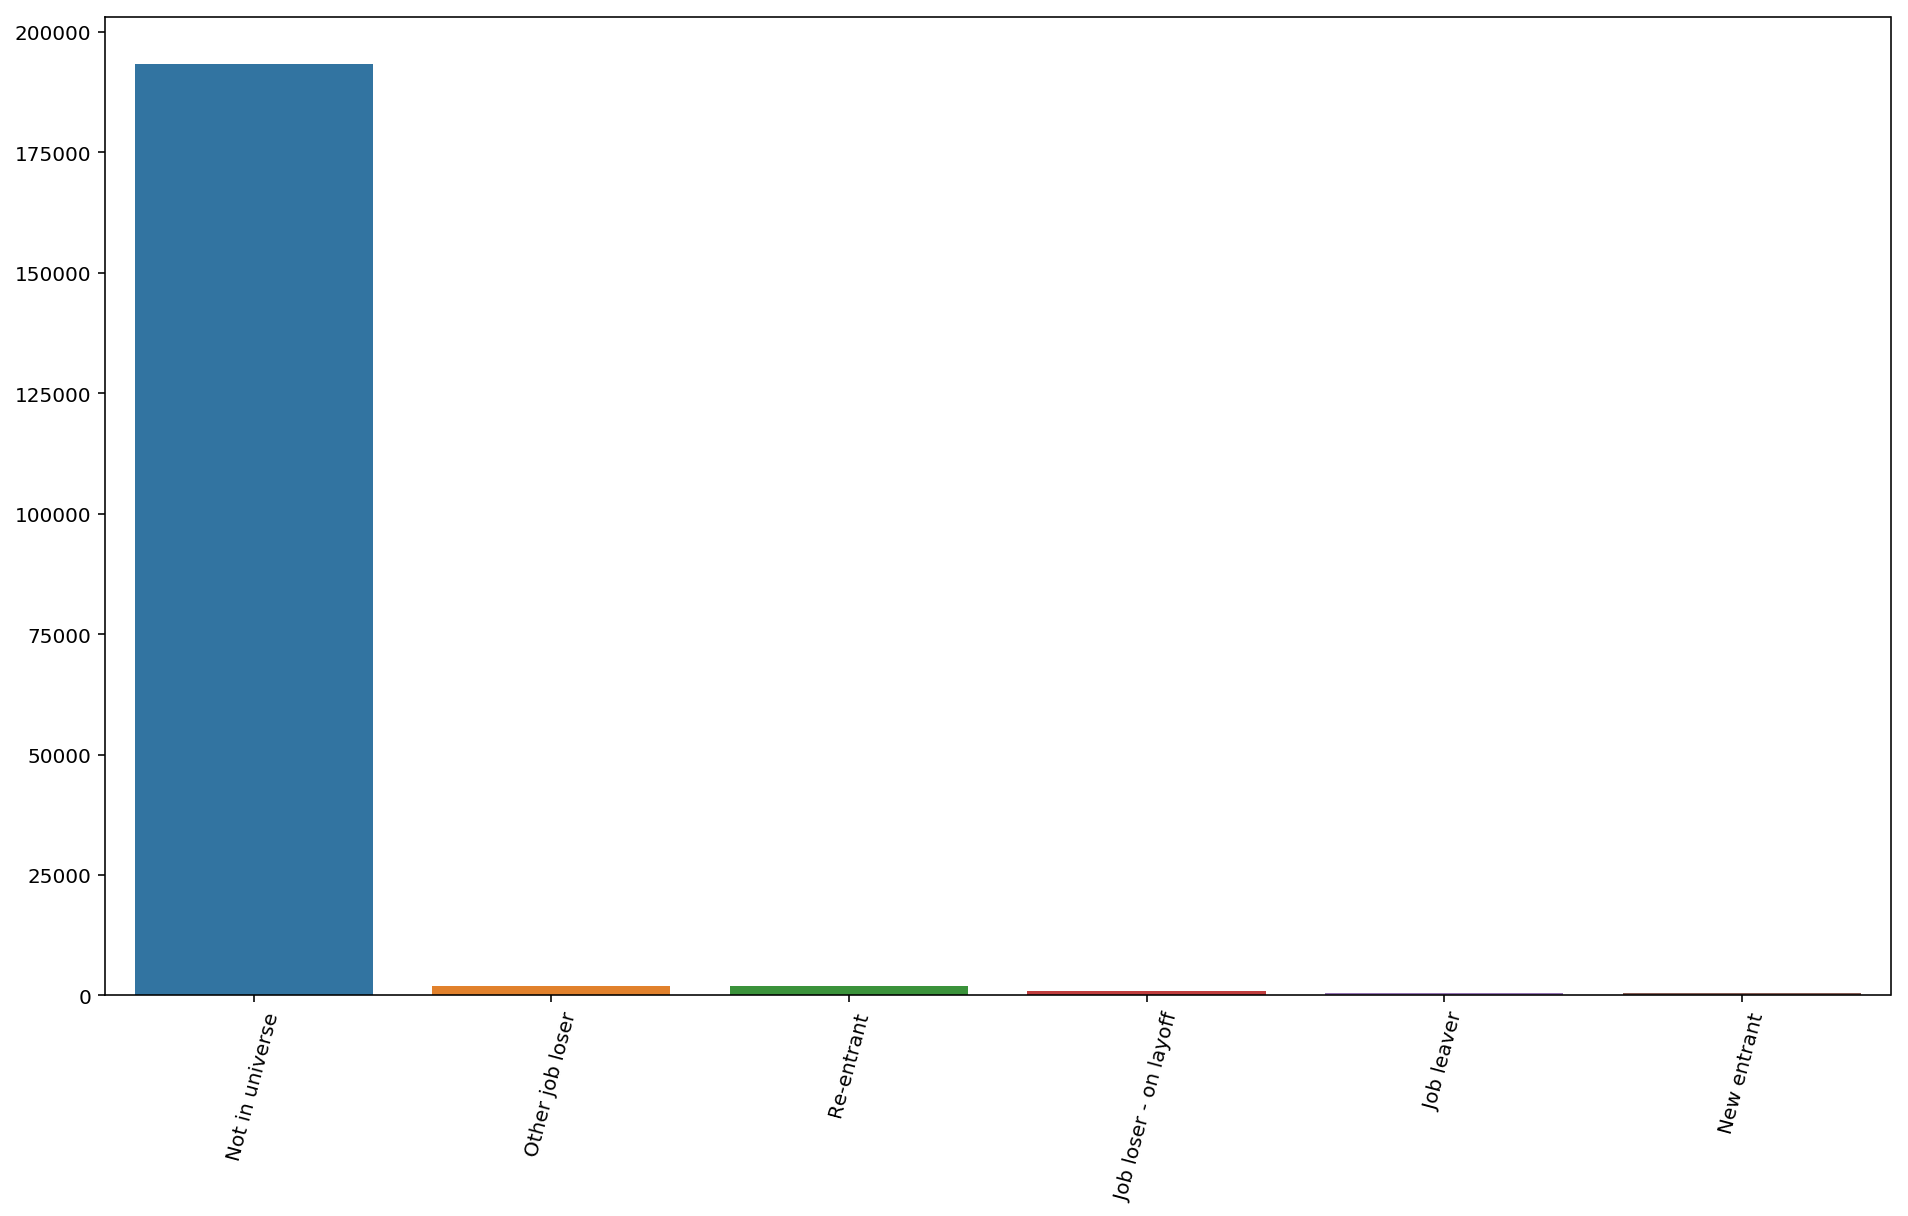

In [18]:
create_countplot('UnemploymentReason','','','')

{'Children or Armed Forces': 123769, 'Full-time schedules': 40736, 'Not in labor force': 26808, 'PT for non-econ reasons usually FT': 3322, 'Unemployed full-time': 2311, 'PT for econ reasons usually PT': 1209, 'Unemployed part- time': 843, 'PT for econ reasons usually FT': 525}


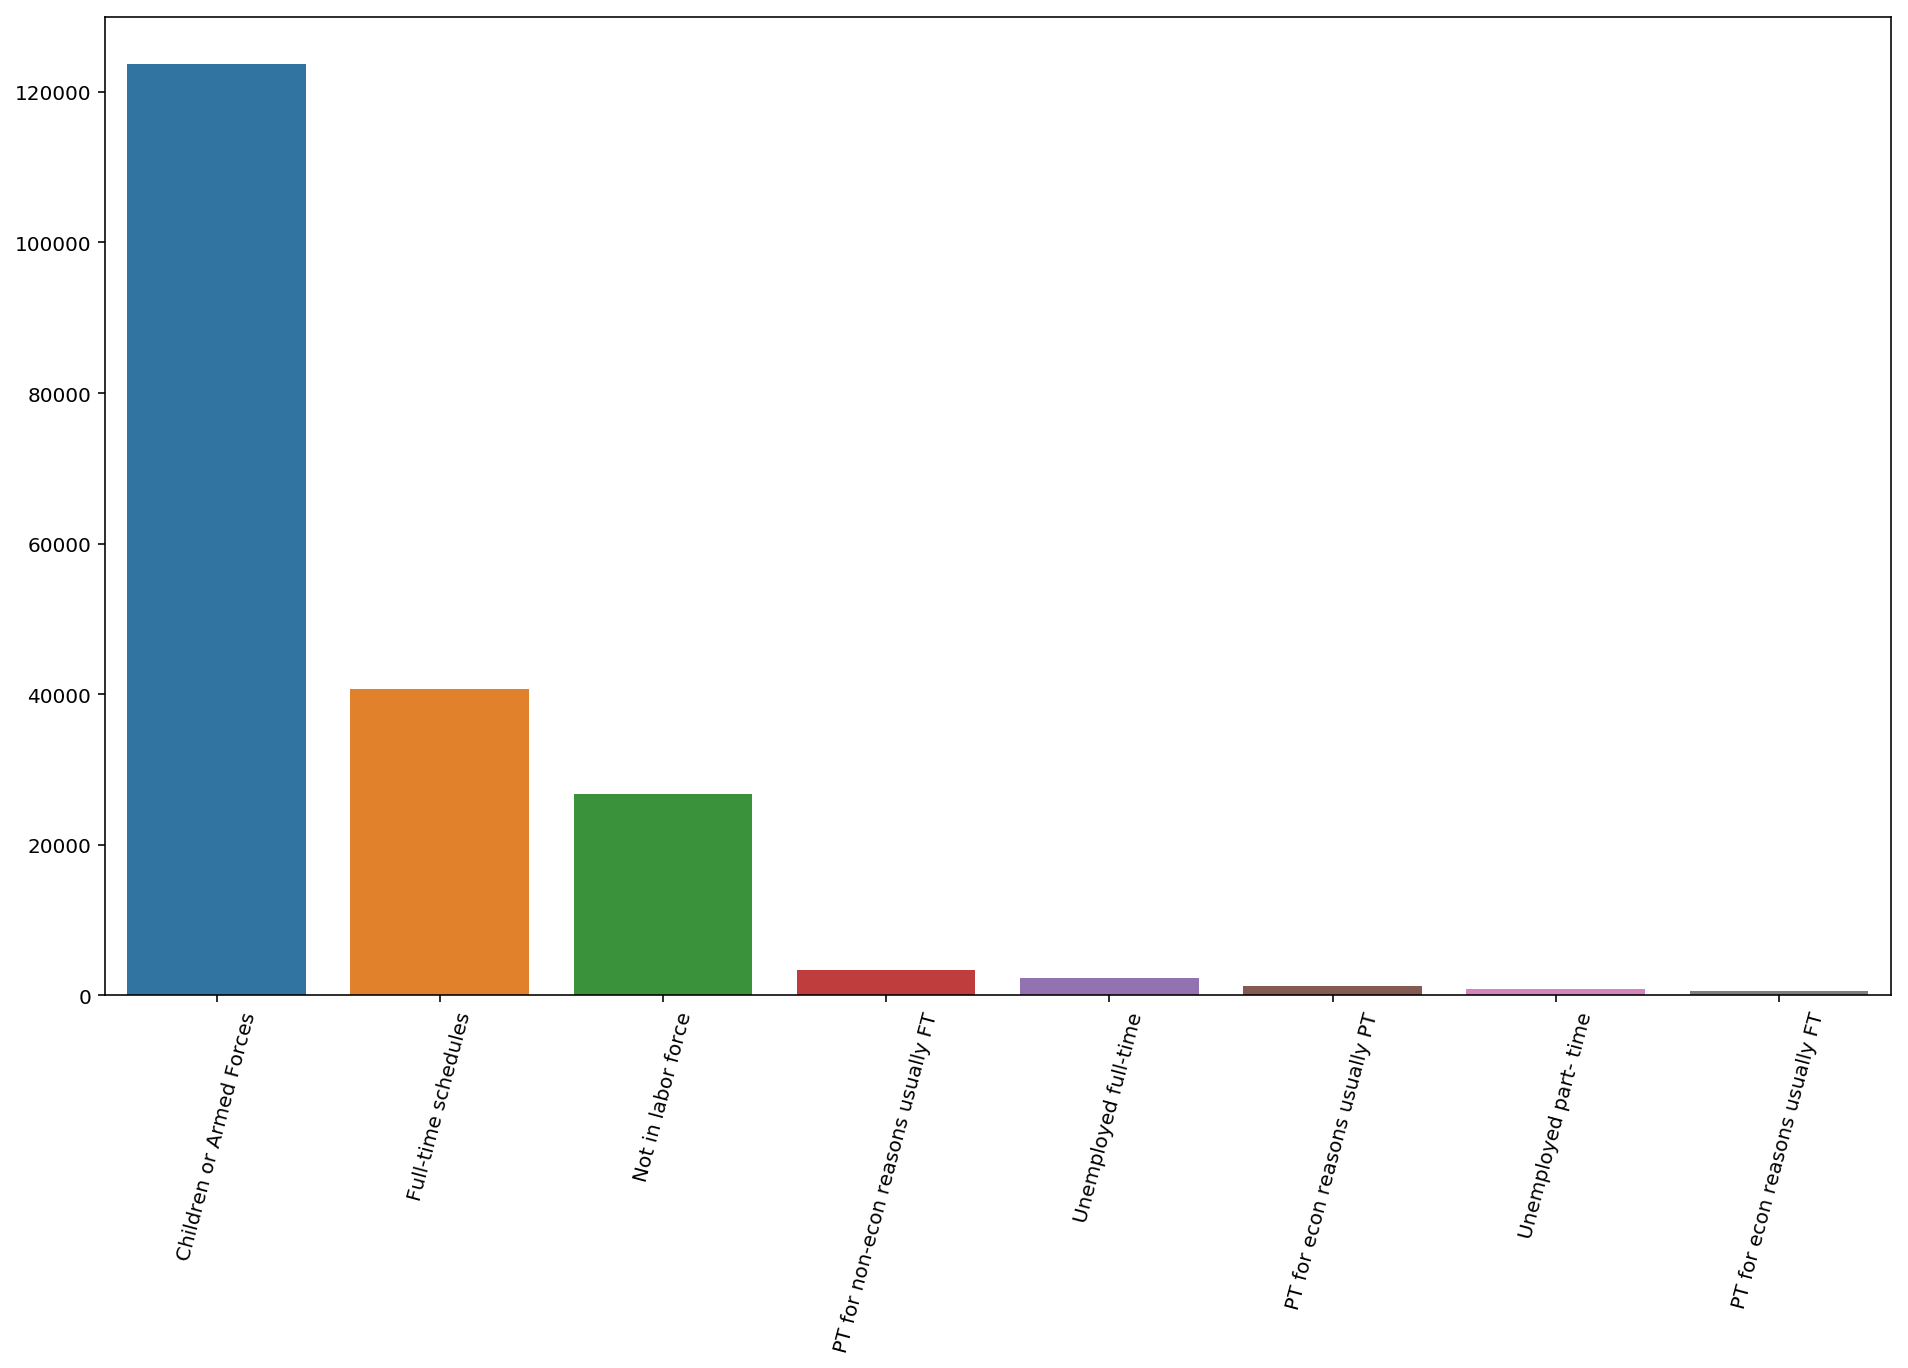

In [19]:
create_countplot('EmploymentStatus','','','')

{'Nonfiler': 75094, 'Joint both under 65': 67383, 'Single': 37421, 'Joint both 65+': 8332, 'Head of household': 7426, 'Joint one under 65 & one 65+': 3867}


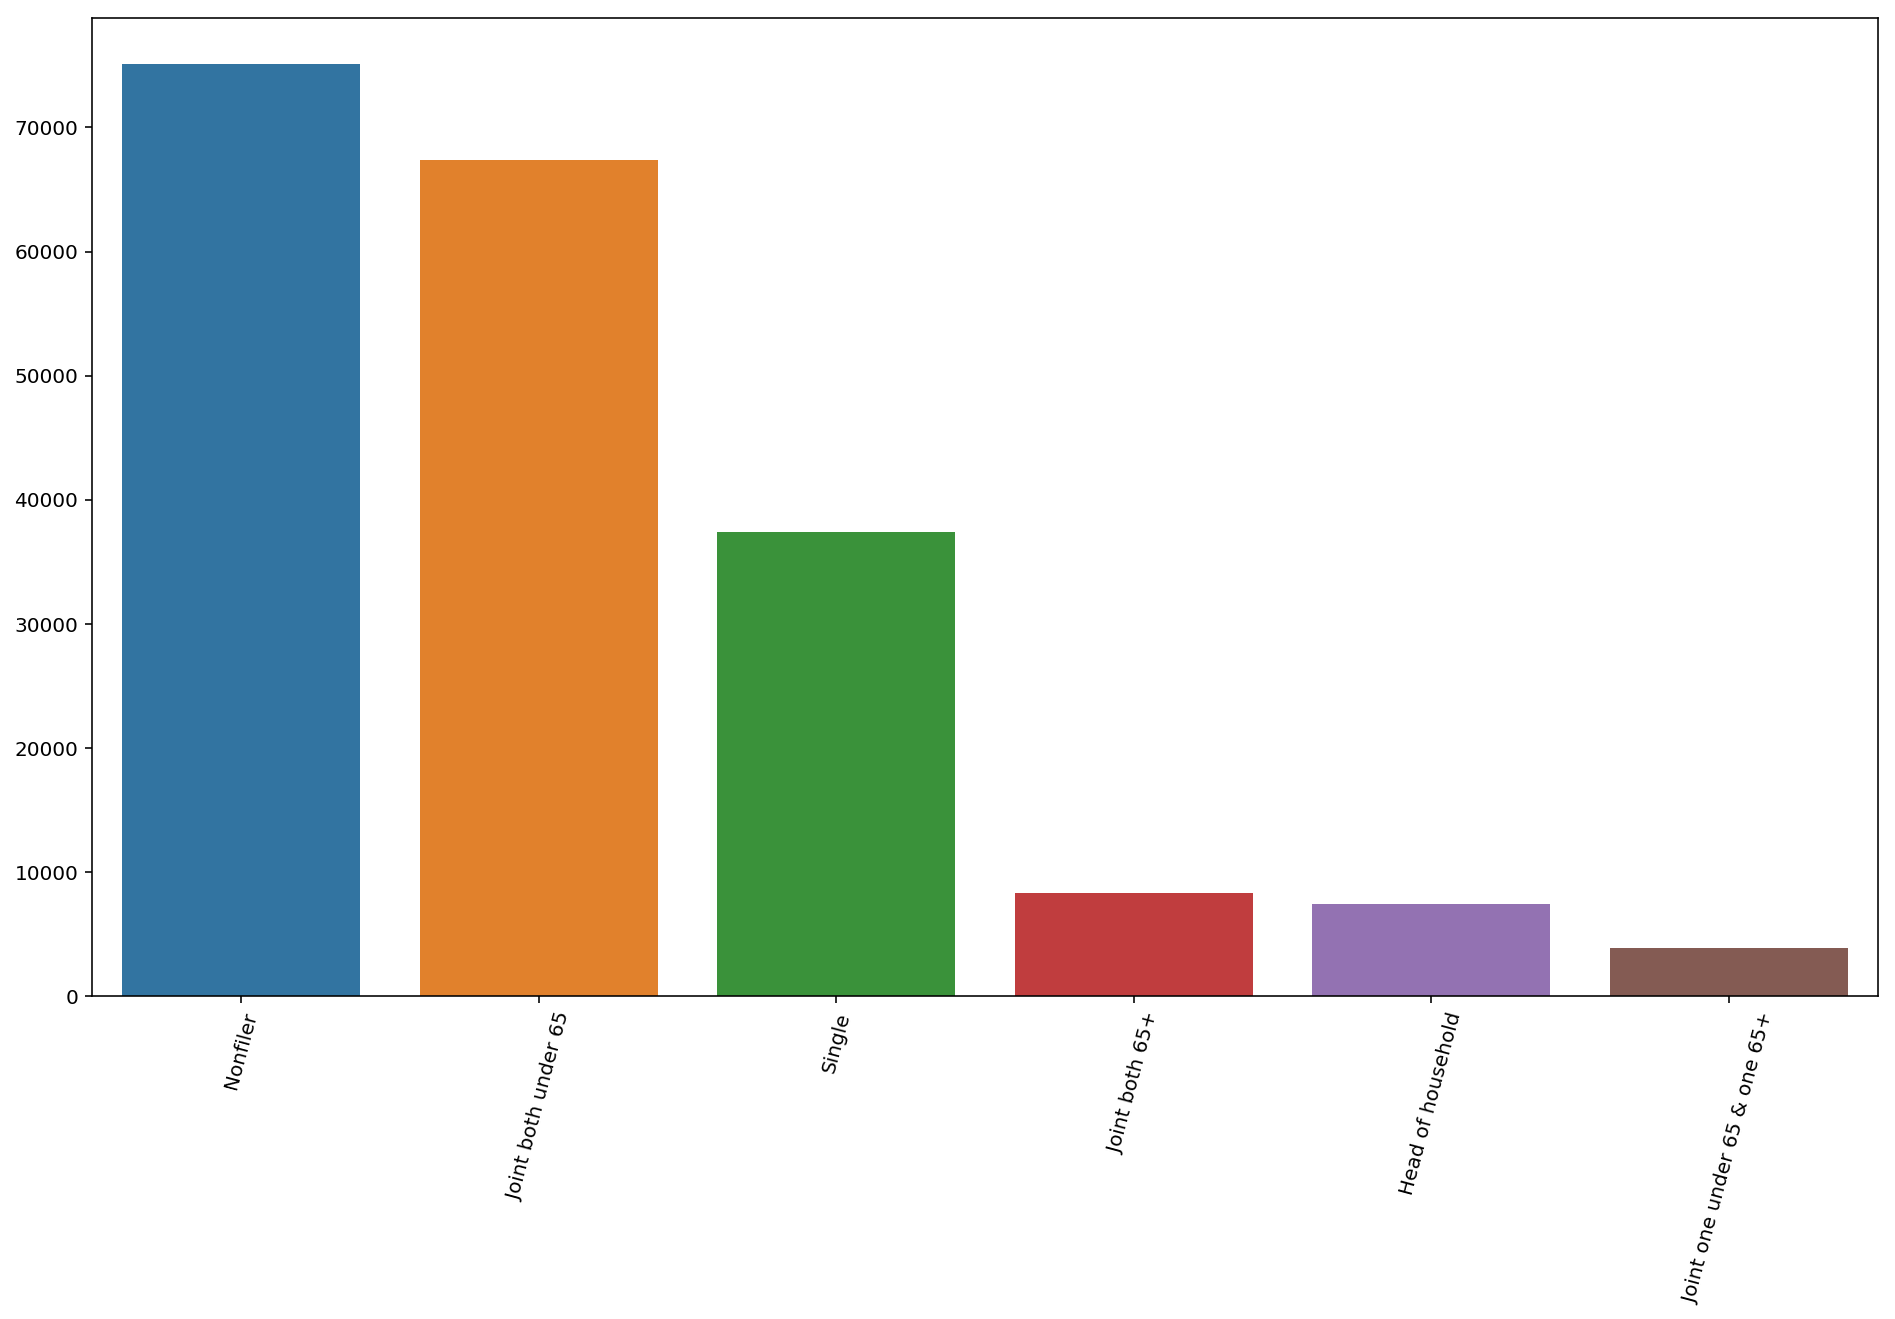

In [20]:
create_countplot('FEDERALTAX','','','')

{'Not in universe': 183750, 'South': 4889, 'West': 4074, 'Midwest': 3575, 'Northeast': 2705, 'Abroad': 530}


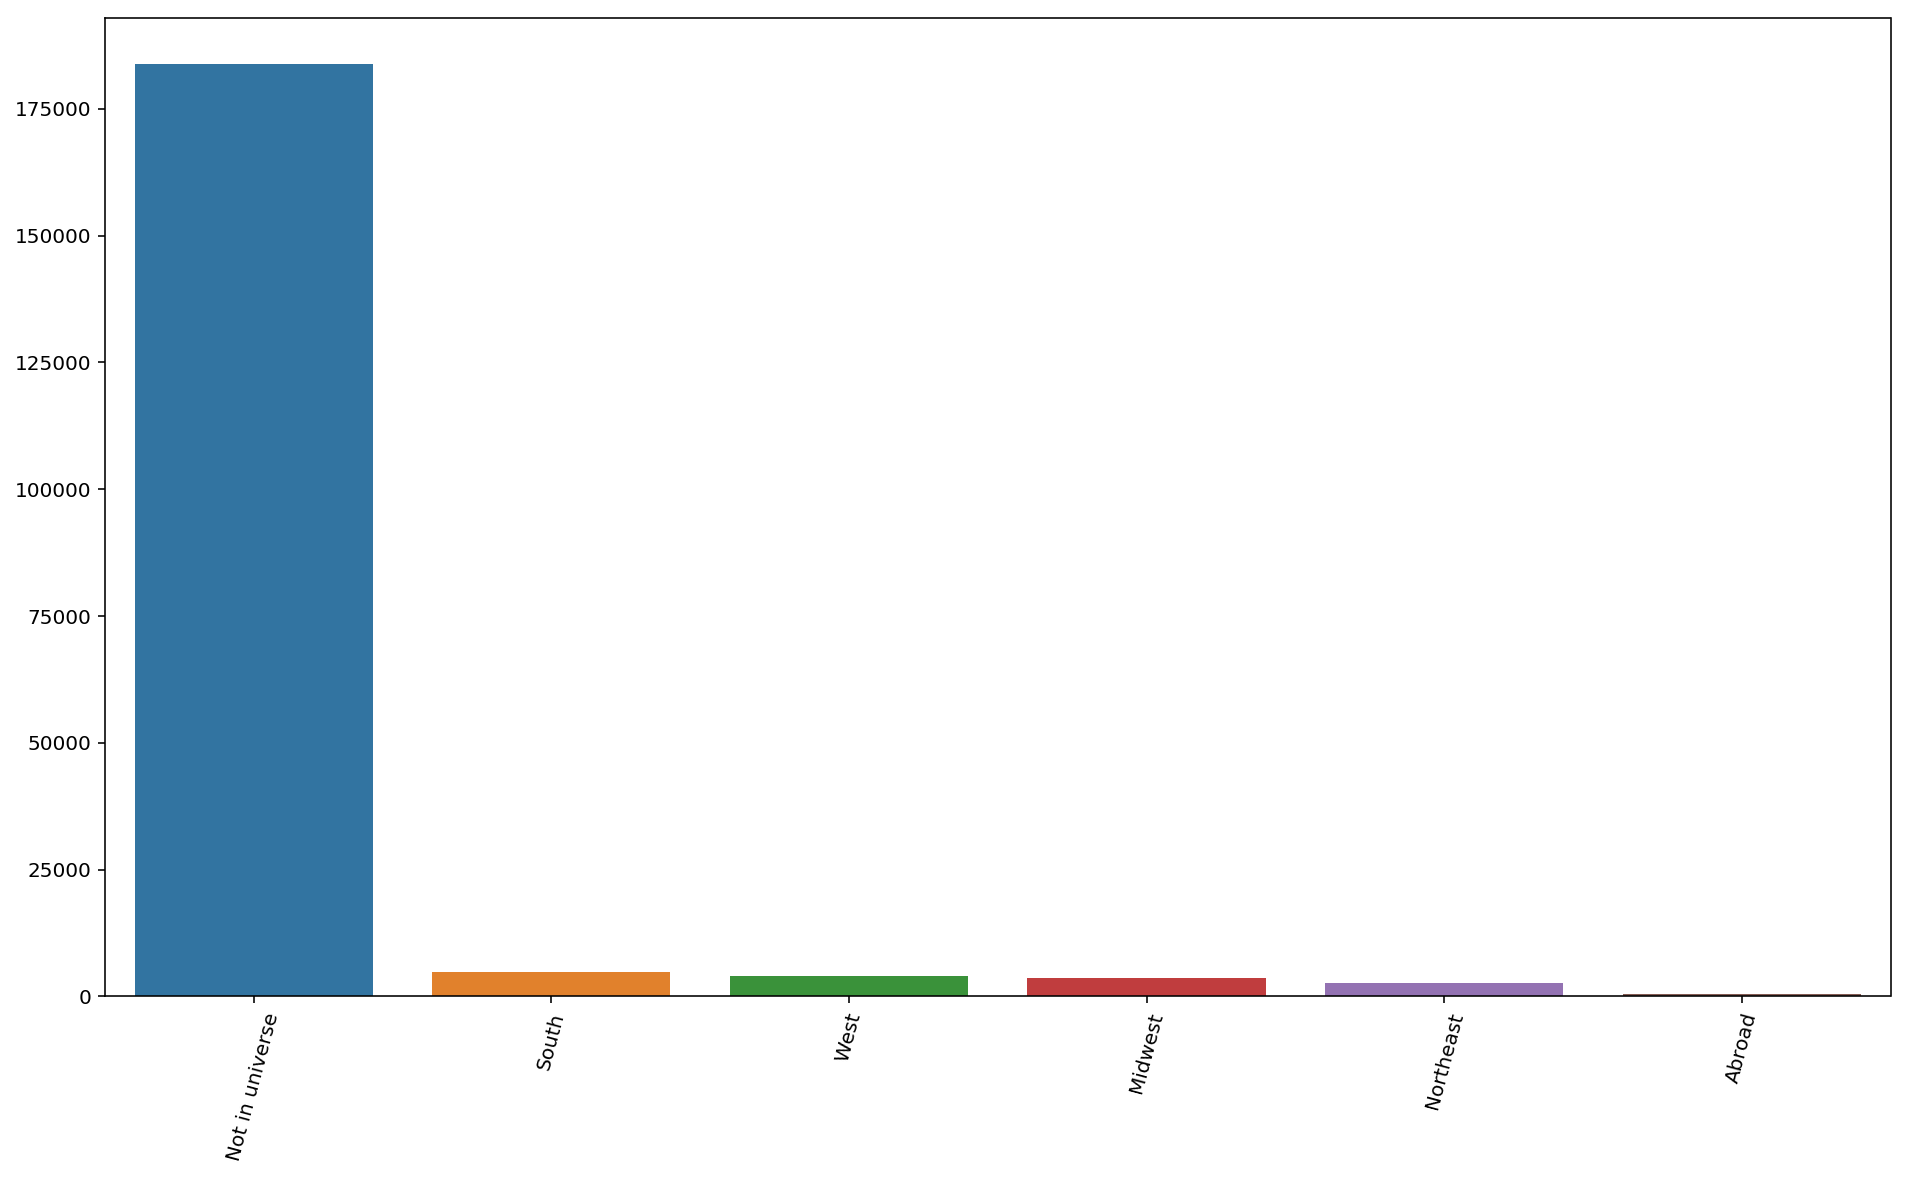

In [21]:
create_countplot('TaxFilerStat','','','')

{'Not in universe': 183750, 'California': 1714, 'Utah': 1063, 'Florida': 849, 'North Carolina': 812, 'Unavailable': 708, 'Abroad': 671, 'Oklahoma': 626, 'Minnesota': 576, 'Indiana': 533, 'North Dakota': 499, 'New Mexico': 463, 'Michigan': 441, 'Alaska': 290, 'Kentucky': 244, 'Arizona': 243, 'New Hampshire': 242, 'Wyoming': 241, 'Colorado': 239, 'Oregon': 236, 'West Virginia': 231, 'Georgia': 227, 'Montana': 226, 'Alabama': 216, 'Ohio': 211, 'Texas': 209, 'Arkansas': 205, 'Mississippi': 204, 'Tennessee': 202, 'Pennsylvania': 199, 'New York': 195, 'Louisiana': 192, 'Vermont': 191, 'Iowa': 189, 'Illinois': 180, 'Nebraska': 178, 'Missouri': 175, 'Nevada': 174, 'Maine': 167, 'Massachusetts': 151, 'Kansas': 149, 'South Dakota': 138, 'Maryland': 136, 'Virginia': 126, 'Connecticut': 117, 'District of Columbia': 116, 'Wisconsin': 105, 'South Carolina': 95, 'New Jersey': 75, 'Delaware': 73, 'Idaho': 31}


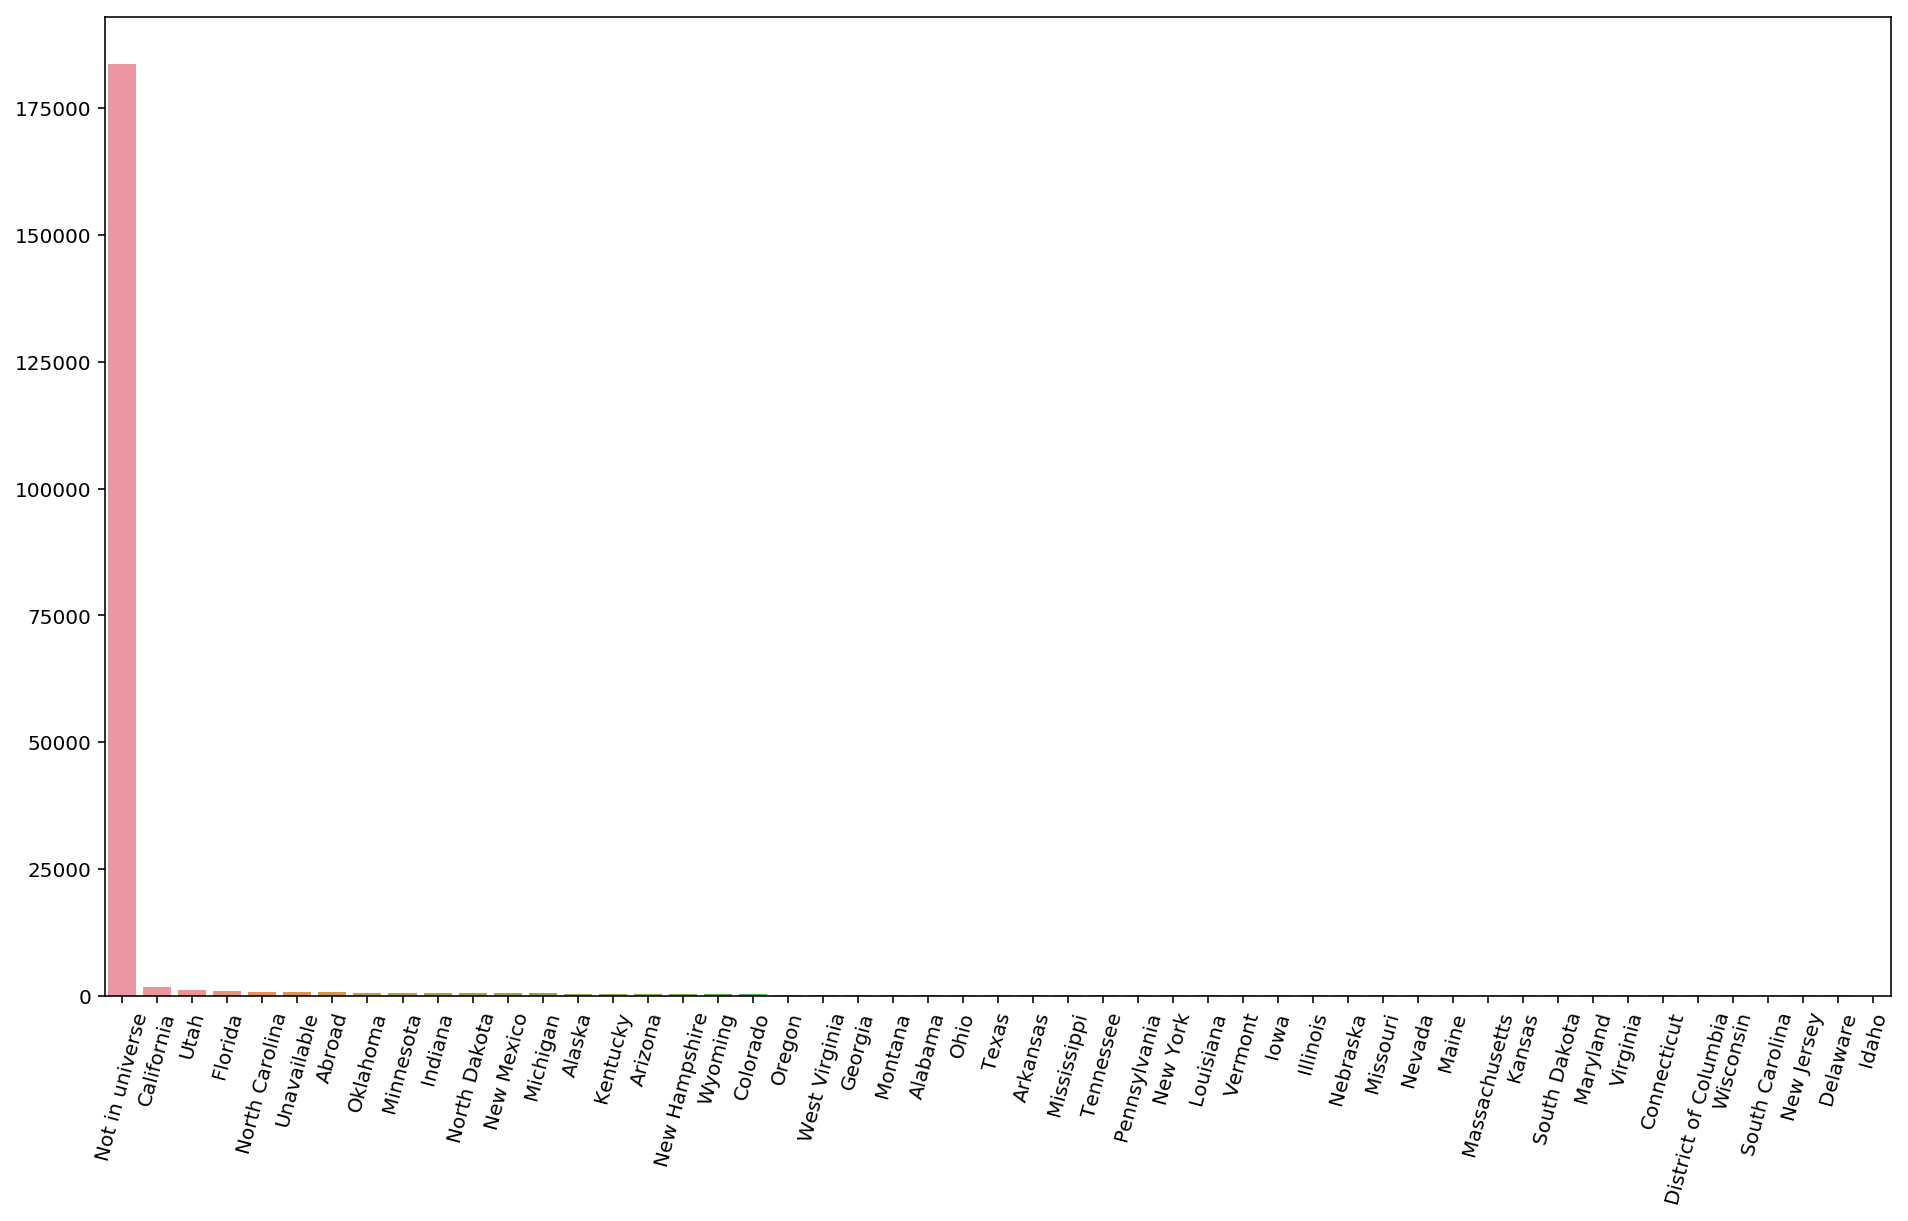

In [22]:
create_countplot('PrevState','','','')

{'Householder': 53248, 'Child <18 never marr not in subfamily': 50326, 'Spouse of householder': 41695, 'Nonfamily householder': 22213, 'Child 18+ never marr Not in a subfamily': 12030, 'Secondary individual': 6122, 'Other Rel 18+ ever marr not in subfamily': 1956, 'Grandchild <18 never marr child of subfamily RP': 1868, 'Other Rel 18+ never marr not in subfamily': 1728, 'Grandchild <18 never marr not in subfamily': 1066, 'Child 18+ ever marr Not in a subfamily': 1013, 'Child under 18 of RP of unrel subfamily': 732, 'RP of unrelated subfamily': 685, 'Child 18+ ever marr RP of subfamily': 671, 'Other Rel 18+ ever marr RP of subfamily': 656, 'Other Rel <18 never marr child of subfamily RP': 656, 'Other Rel 18+ spouse of subfamily RP': 638, 'Child 18+ never marr RP of subfamily': 589, 'Other Rel <18 never marr not in subfamily': 584, 'Grandchild 18+ never marr not in subfamily': 375, 'In group quarters': 196, 'Child 18+ spouse of subfamily RP': 126, 'Other Rel 18+ never marr RP of subfamil

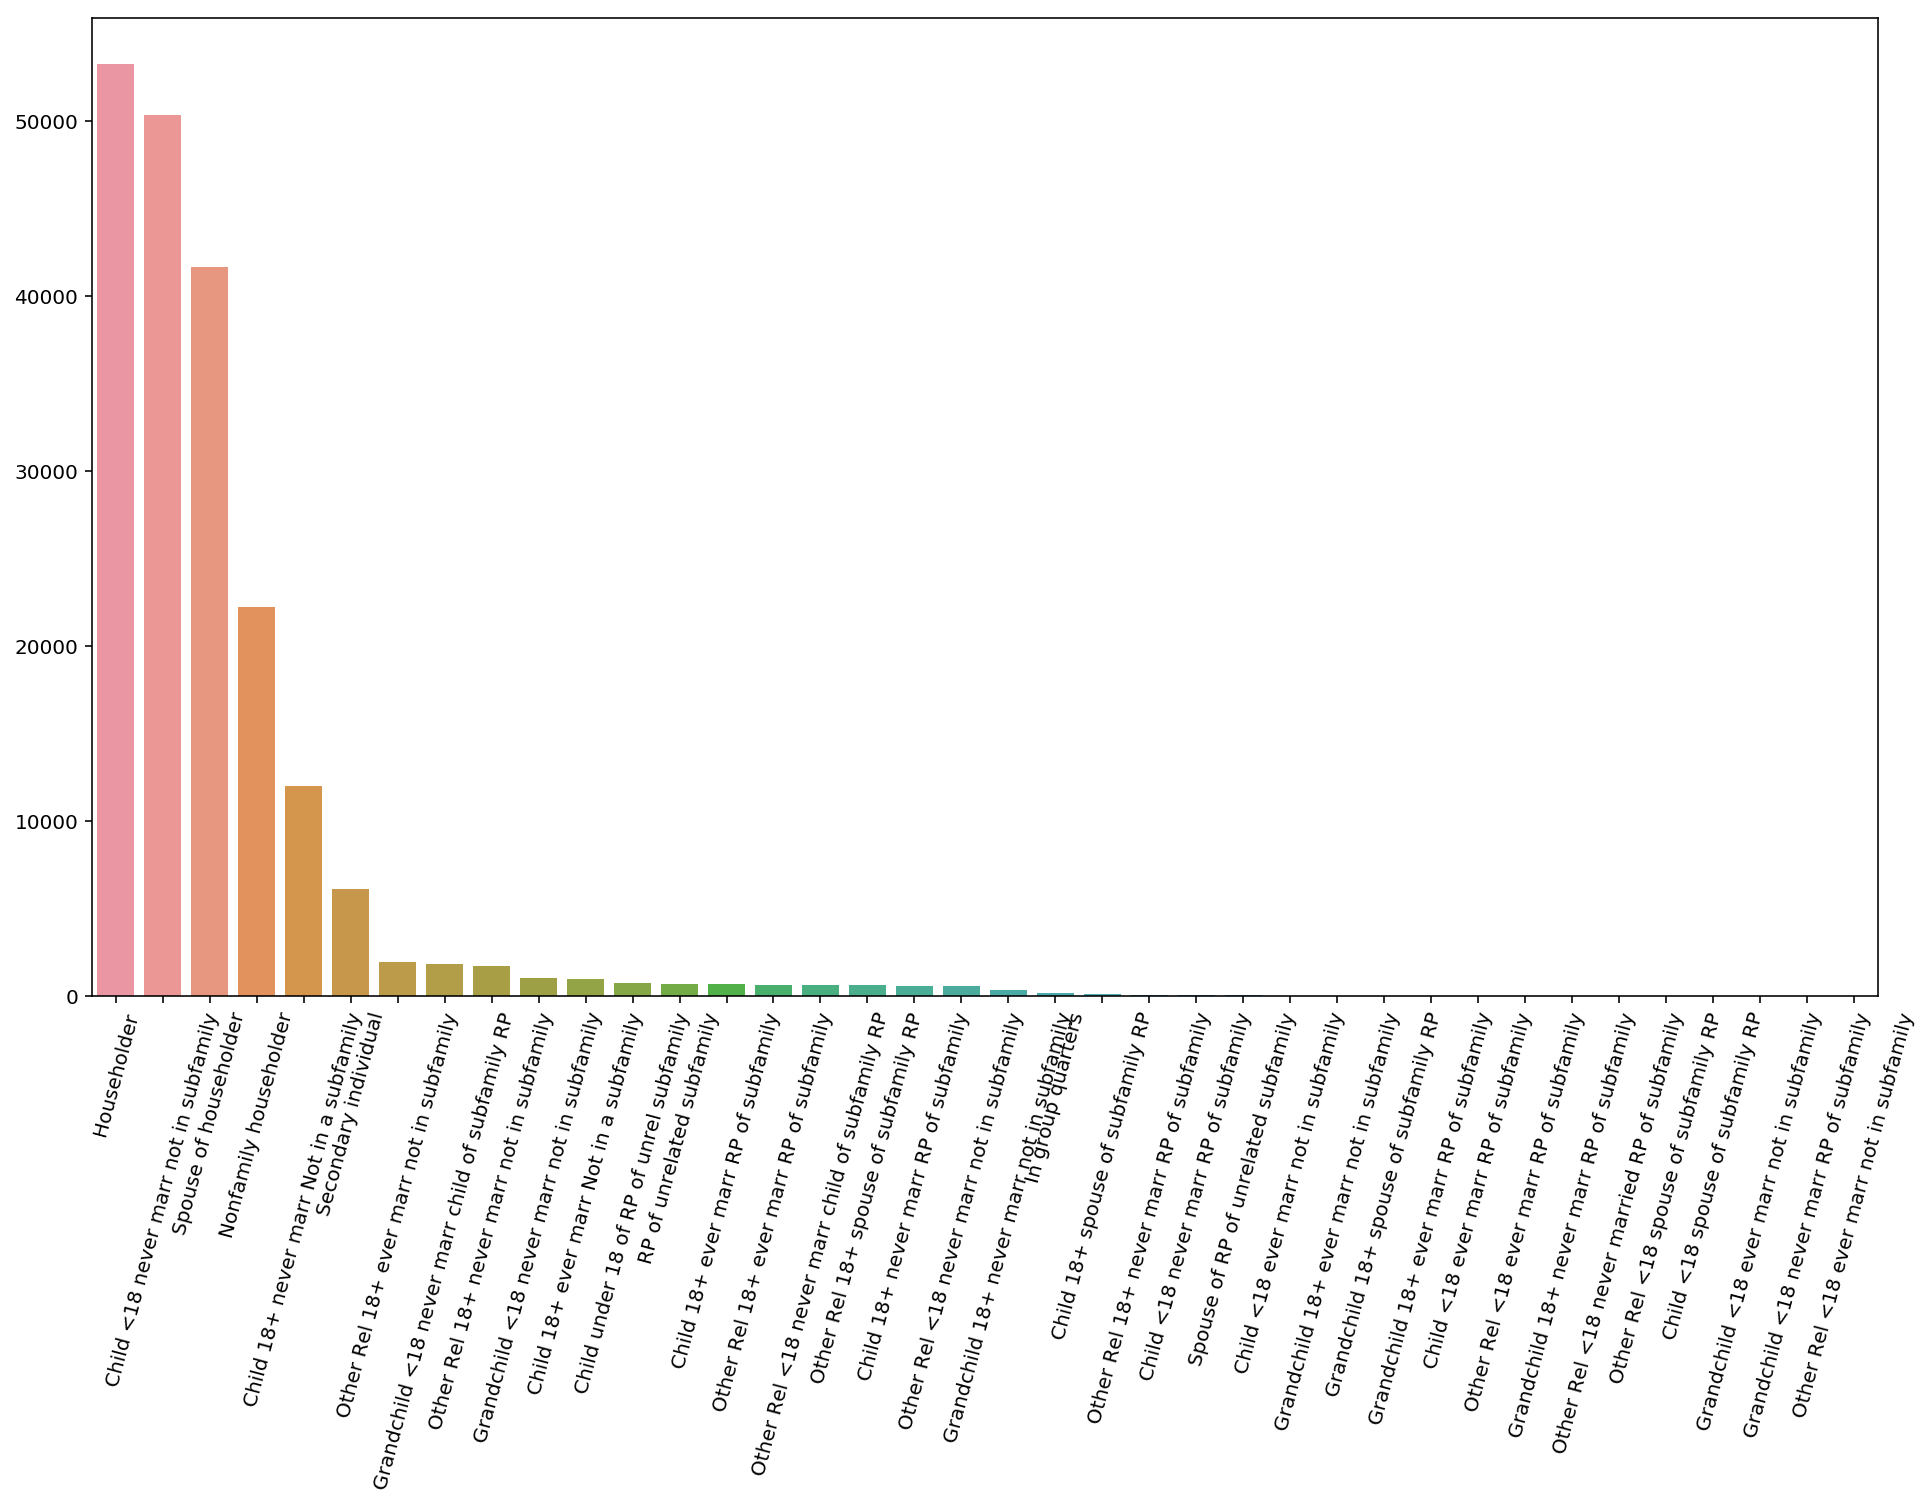

In [23]:
create_countplot('HouseholdStatus','','','')

{'Householder': 75475, 'Child under 18 never married': 50426, 'Spouse of householder': 41709, 'Child 18 or older': 14430, 'Other relative of householder': 9703, 'Nonrelative of householder': 7601, 'Group Quarters- Secondary individual': 132, 'Child under 18 ever married': 47}


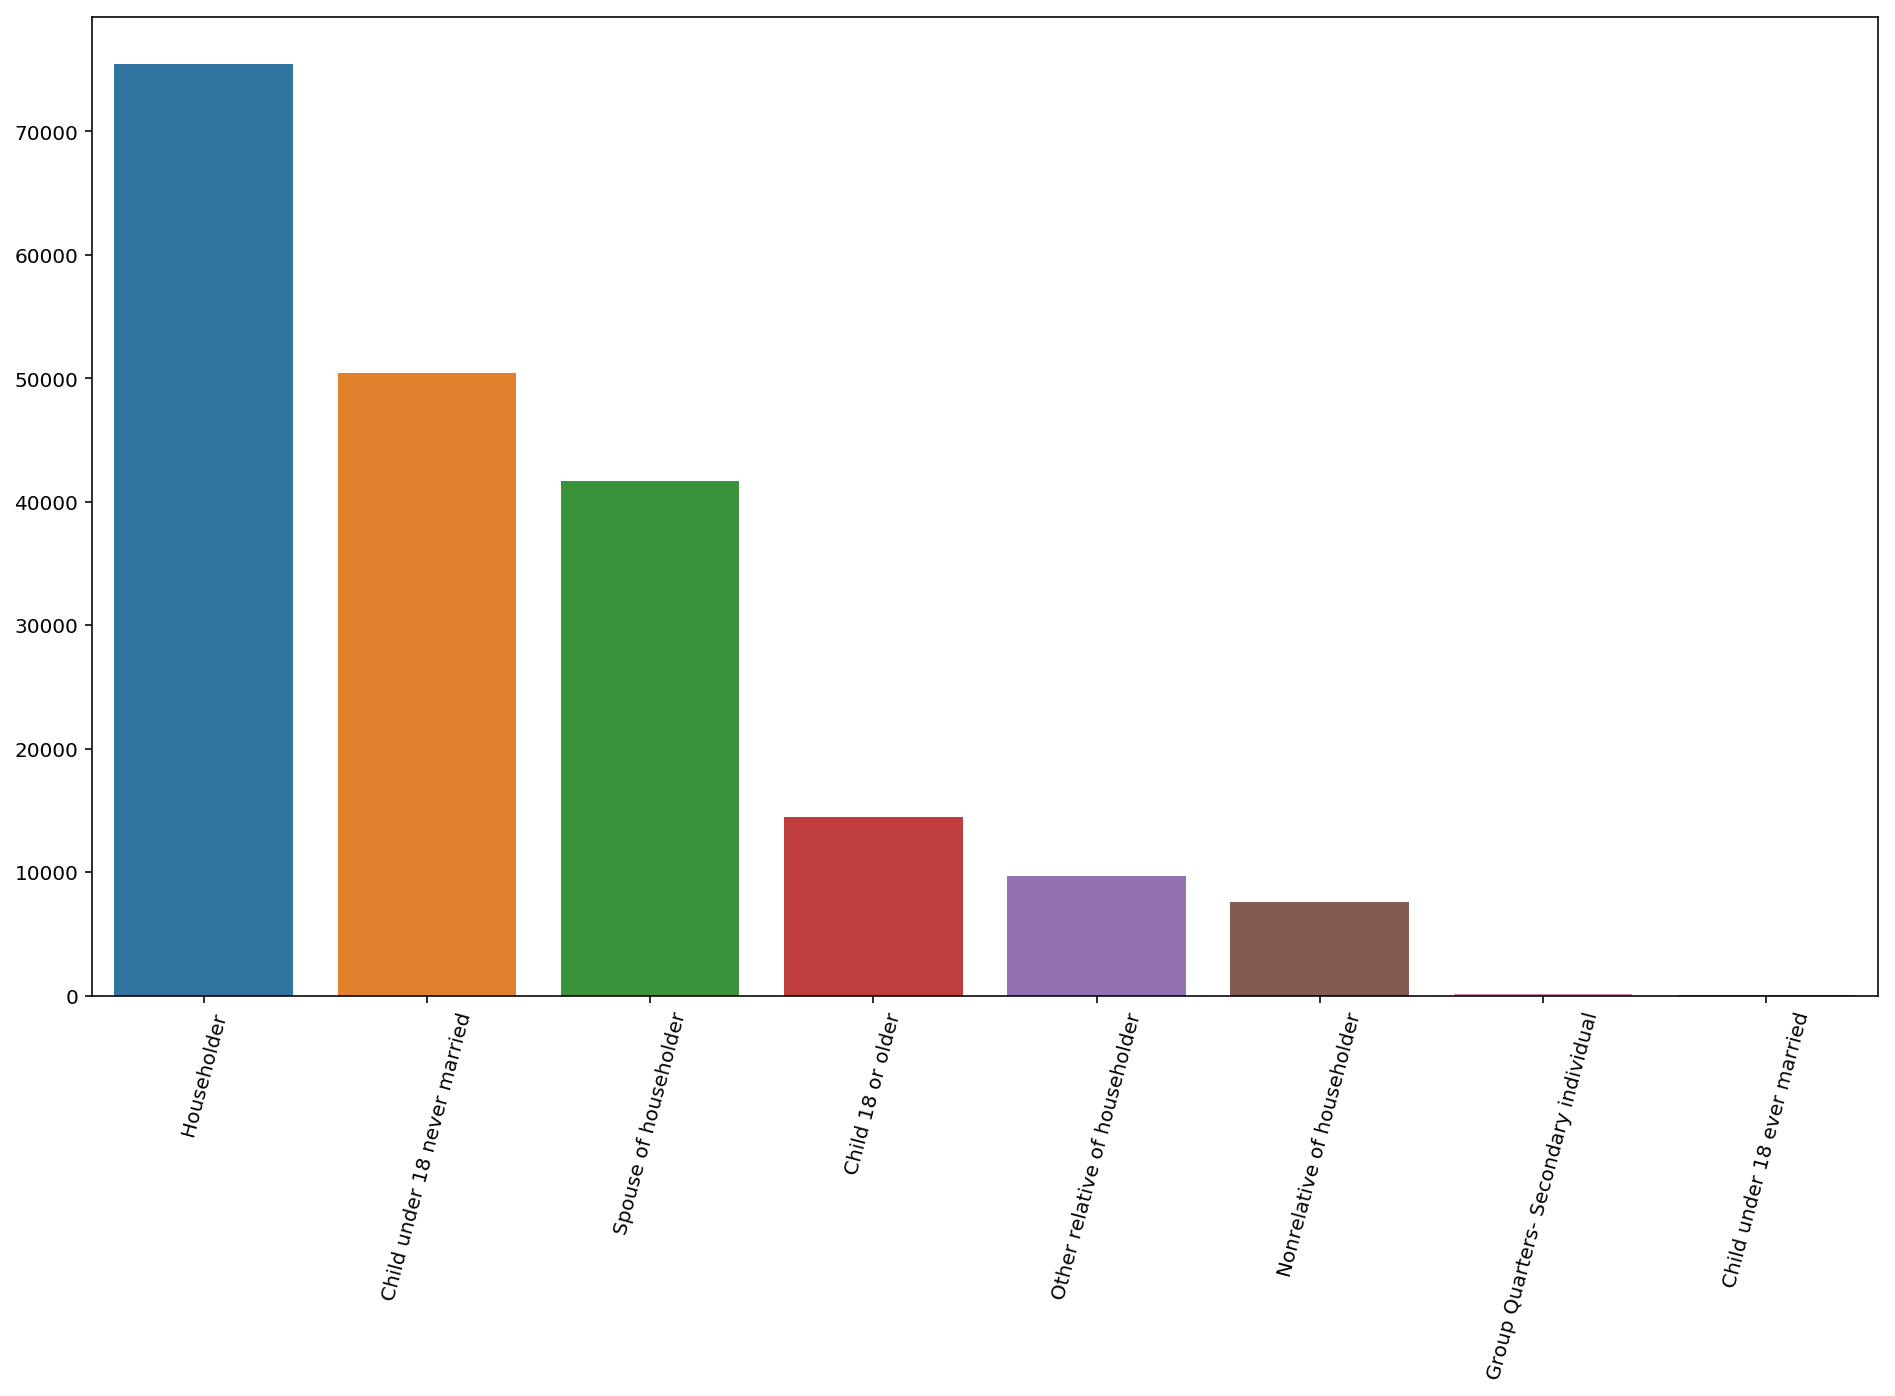

In [24]:
create_countplot('HouseholdSummary','','','')

{'Not in universe under 1 year old': 101212, 'Yes': 82538, 'No': 15773}


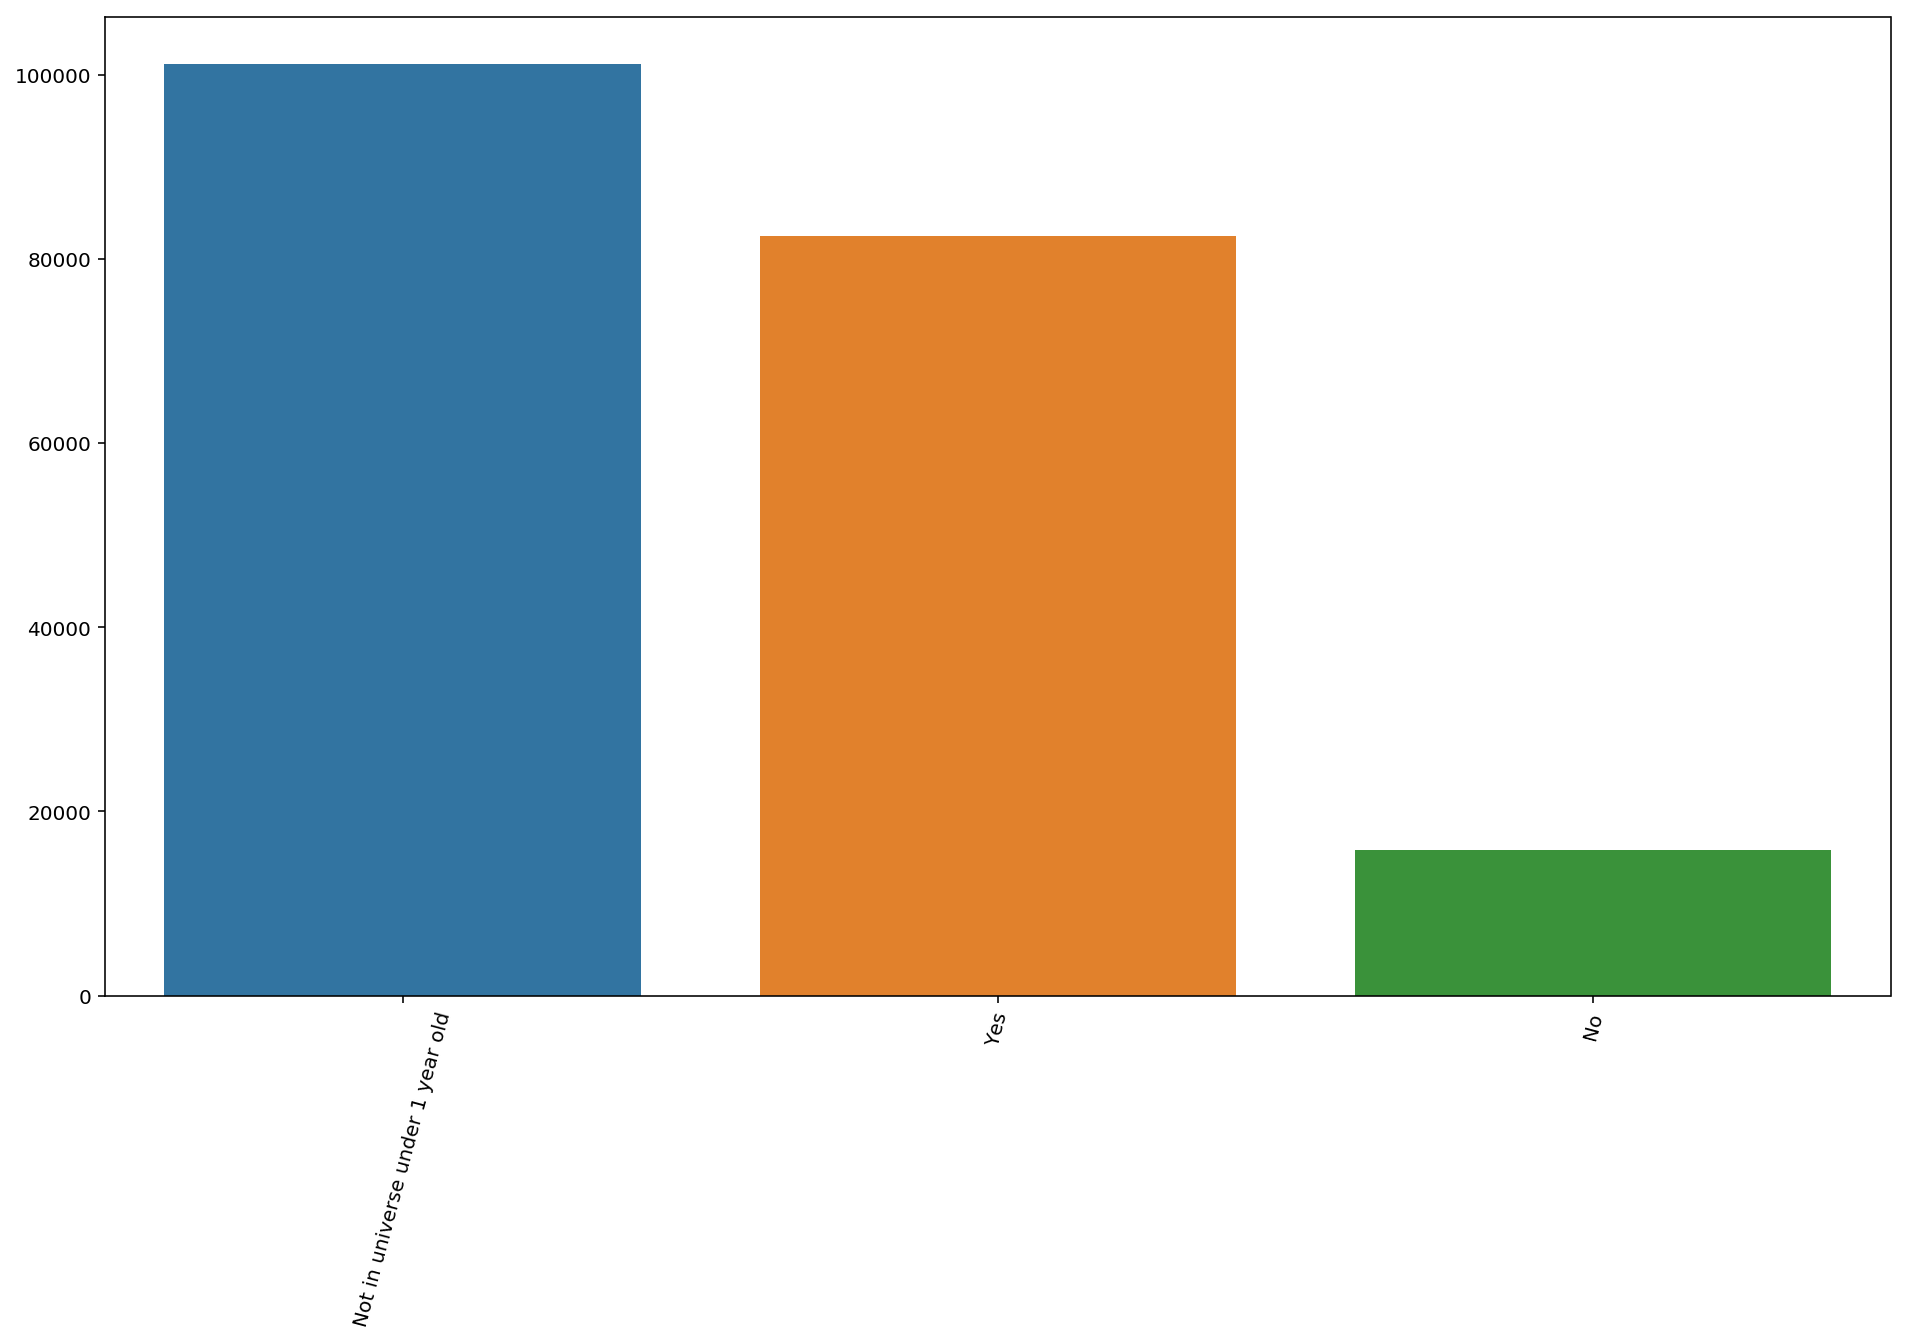

In [25]:
create_countplot('LiveInHouse','','','')

{'Not in universe': 144232, 'Both parents present': 38983, 'Mother only present': 12772, 'Father only present': 1883, 'Neither parent present': 1653}


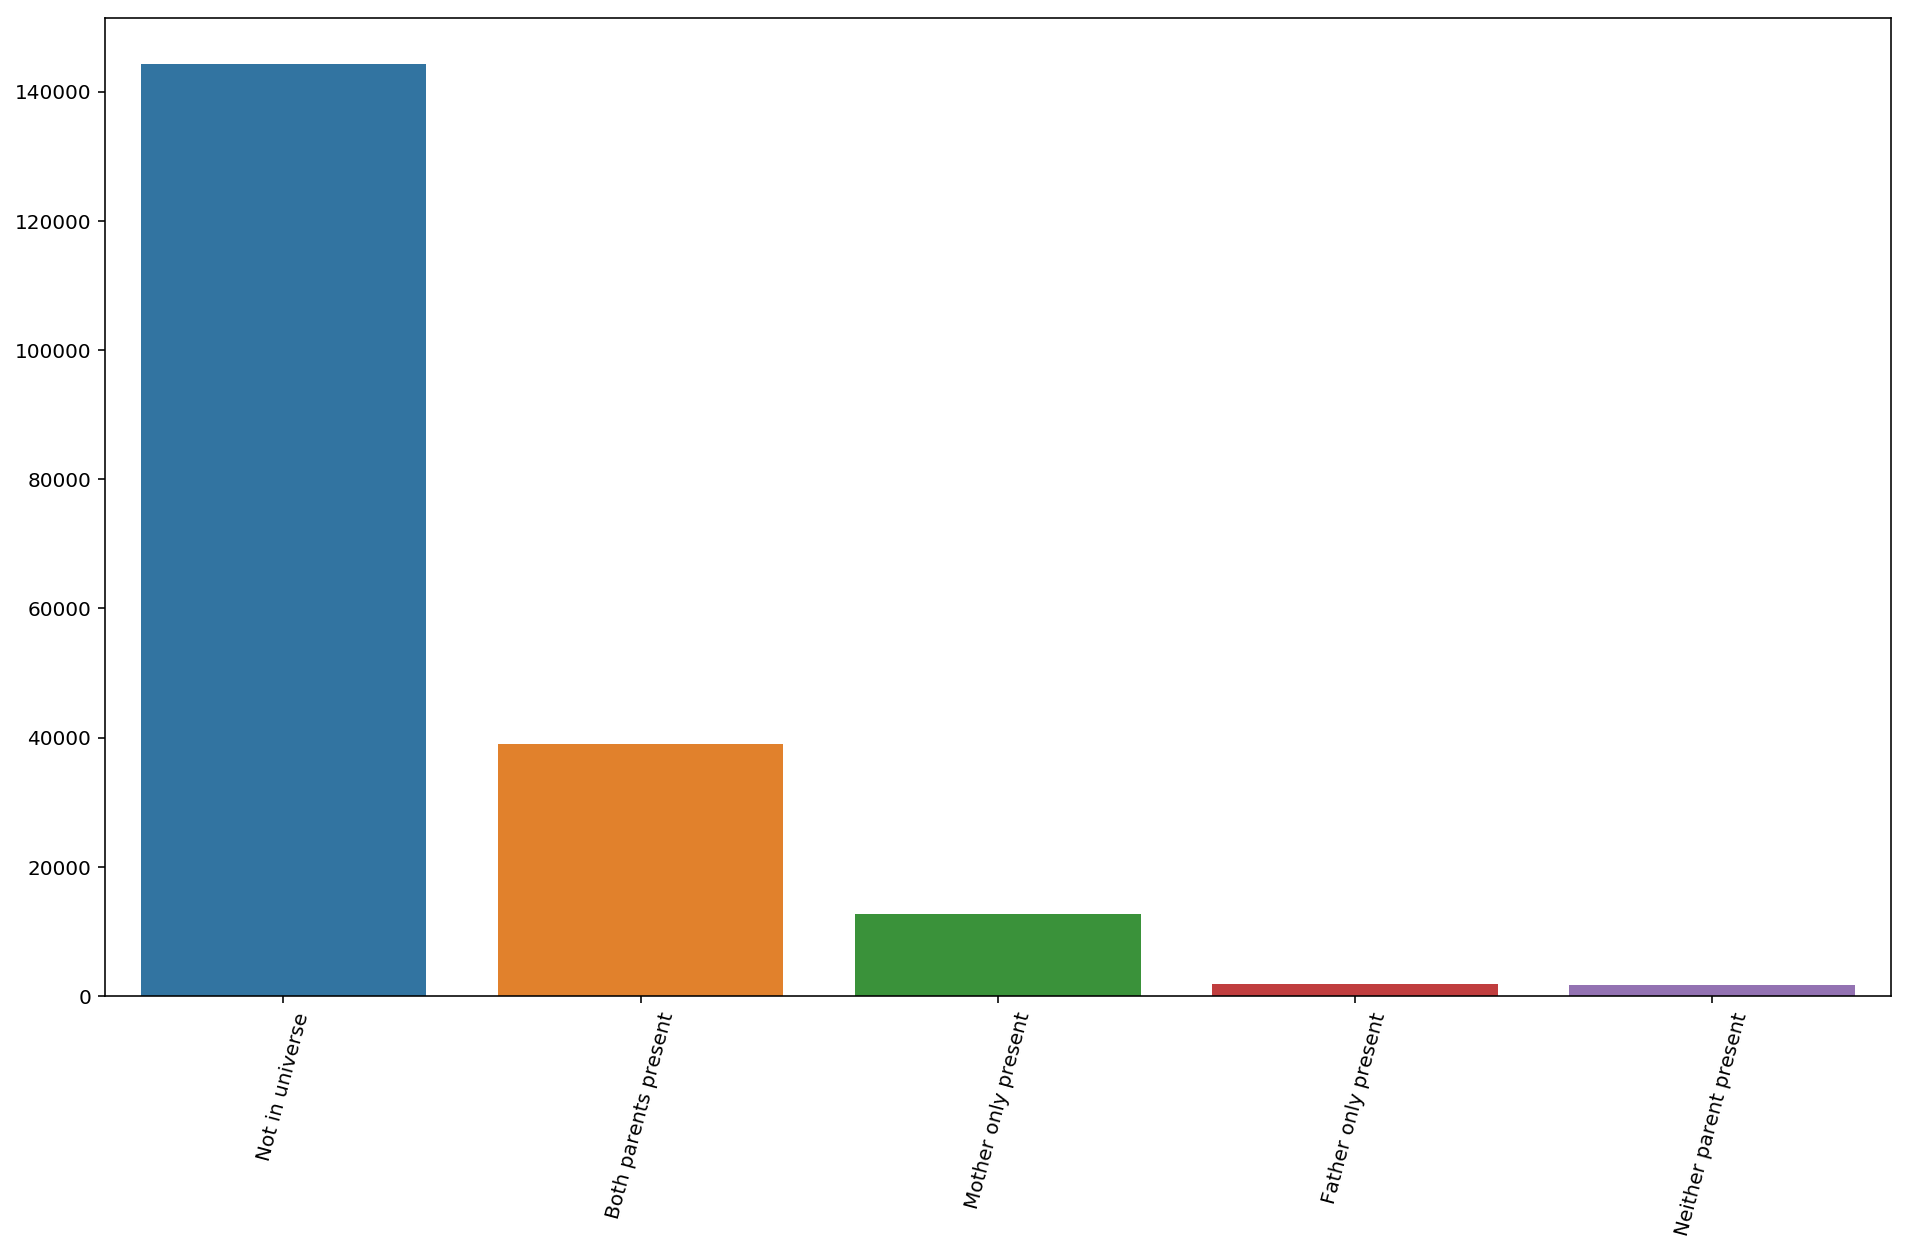

In [26]:
create_countplot('Parent','','','')

{'United-States': 159163, 'Mexico': 10008, 'Unavailable': 6713, 'Puerto-Rico': 2680, 'Italy': 2212, 'Canada': 1380, 'Germany': 1356, 'Dominican-Republic': 1290, 'Poland': 1212, 'Philippines': 1154, 'Cuba': 1125, 'El-Salvador': 982, 'China': 856, 'England': 793, 'Columbia': 614, 'India': 580, 'South Korea': 530, 'Ireland': 508, 'Jamaica': 463, 'Vietnam': 457, 'Guatemala': 445, 'Japan': 392, 'Portugal': 388, 'Ecuador': 379, 'Haiti': 351, 'Greece': 344, 'Peru': 335, 'Nicaragua': 315, 'Hungary': 306, 'Scotland': 247, 'Iran': 233, 'Yugoslavia': 217, 'Taiwan': 199, 'Cambodia': 196, 'Honduras': 194, 'France': 191, 'Outlying-U S (Guam USVI etc)': 159, 'Laos': 154, 'Trinadad&Tobago': 113, 'Thailand': 107, 'Hong Kong': 106, 'Holand-Netherlands': 51, 'Panama': 25}


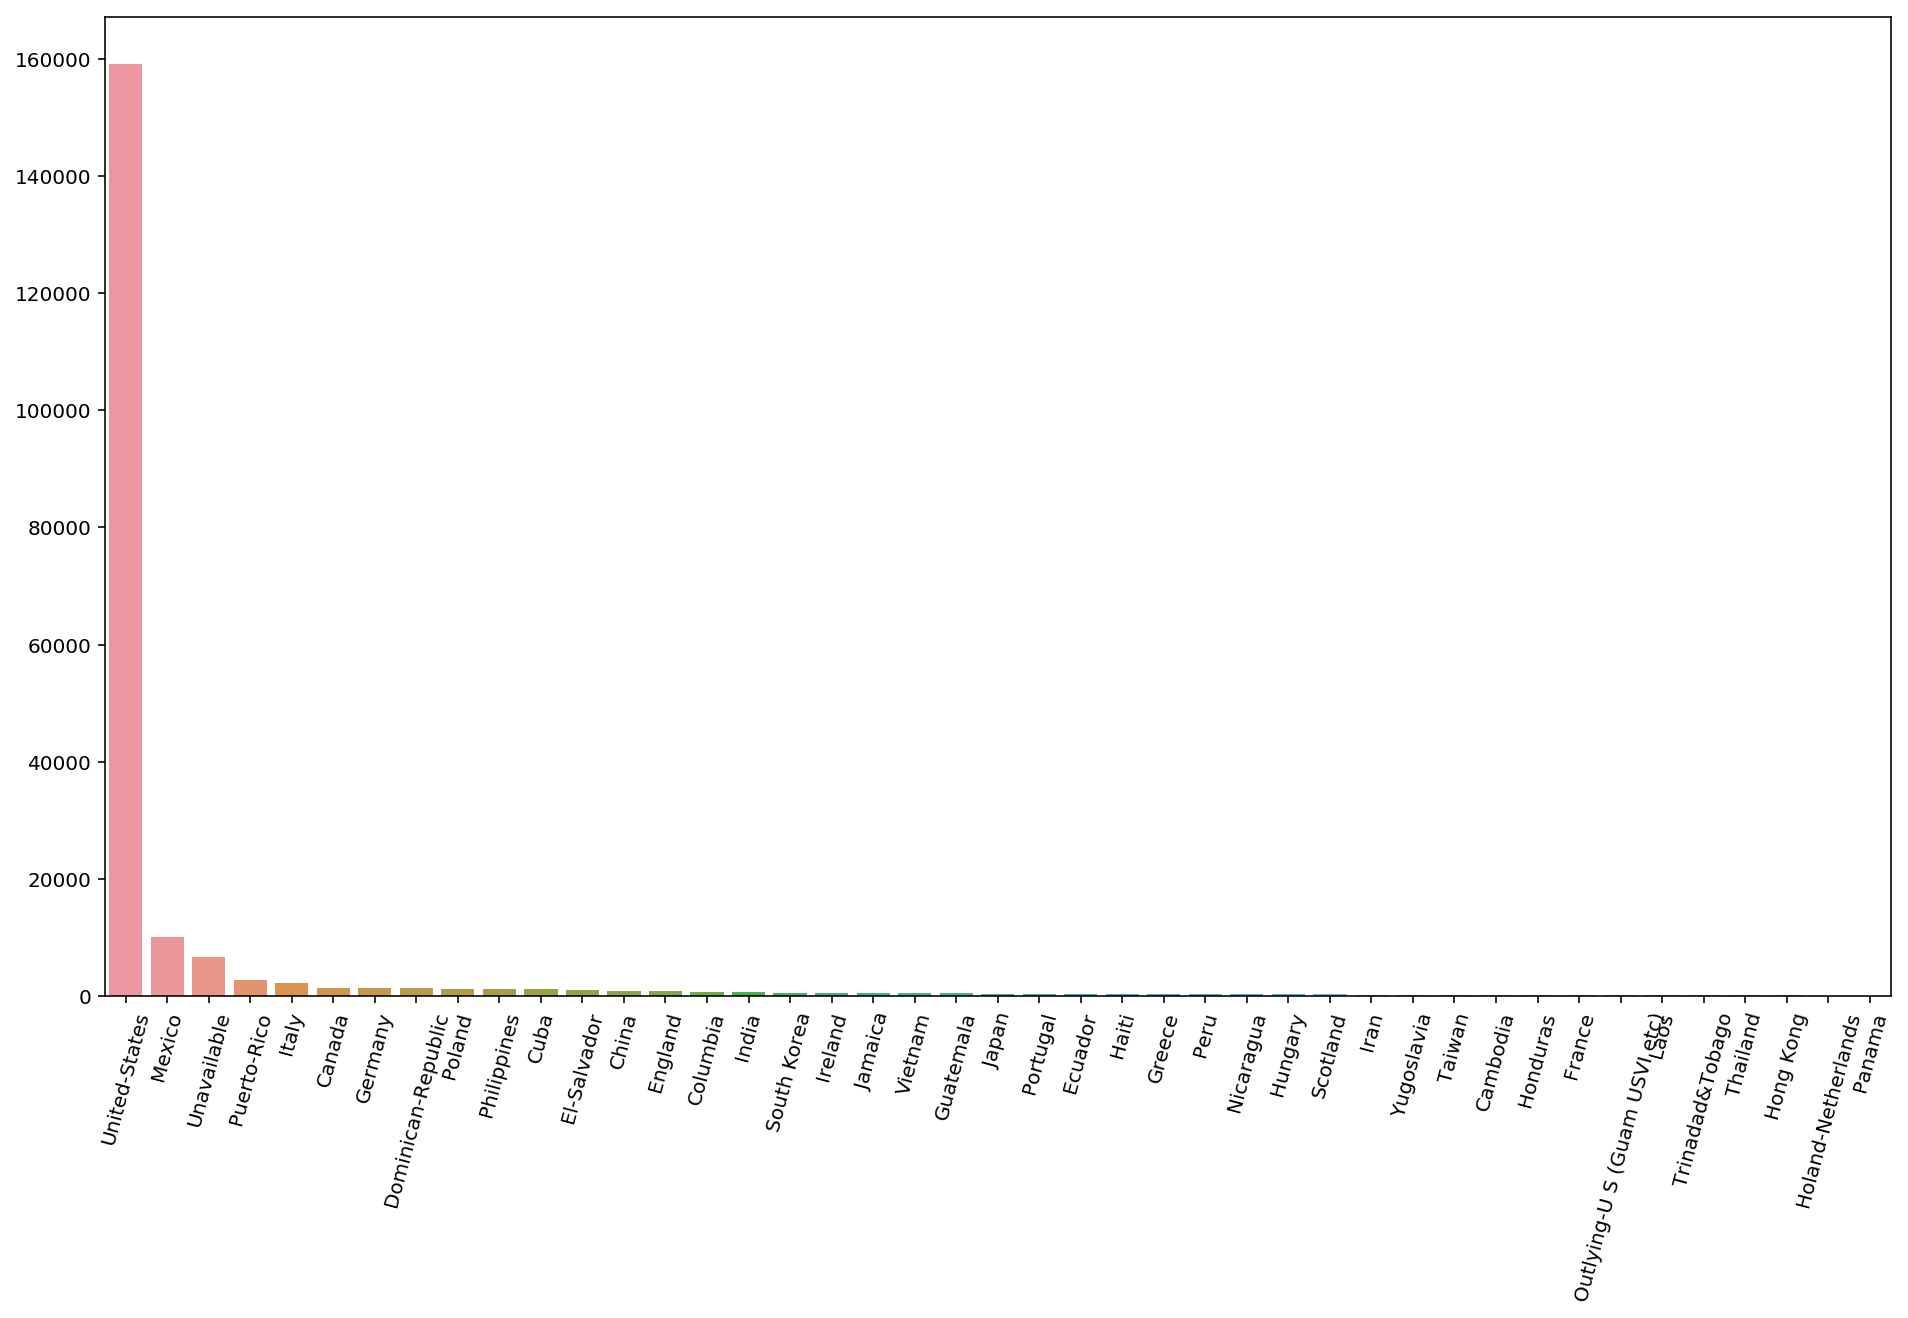

In [27]:
create_countplot('BirthCountryFather','','','')

{'United-States': 160479, 'Mexico': 9781, 'Unavailable': 6119, 'Puerto-Rico': 2473, 'Italy': 1844, 'Canada': 1451, 'Germany': 1382, 'Philippines': 1231, 'Poland': 1110, 'El-Salvador': 1108, 'Cuba': 1108, 'Dominican-Republic': 1103, 'England': 903, 'China': 760, 'Columbia': 612, 'South Korea': 609, 'Ireland': 599, 'India': 581, 'Vietnam': 473, 'Japan': 469, 'Jamaica': 453, 'Guatemala': 444, 'Ecuador': 375, 'Peru': 355, 'Haiti': 353, 'Portugal': 342, 'Nicaragua': 301, 'Hungary': 297, 'Greece': 261, 'Scotland': 241, 'Taiwan': 222, 'Honduras': 218, 'France': 212, 'Iran': 198, 'Yugoslavia': 177, 'Cambodia': 157, 'Outlying-U S (Guam USVI etc)': 157, 'Laos': 155, 'Thailand': 123, 'Hong Kong': 107, 'Trinadad&Tobago': 99, 'Holand-Netherlands': 49, 'Panama': 32}


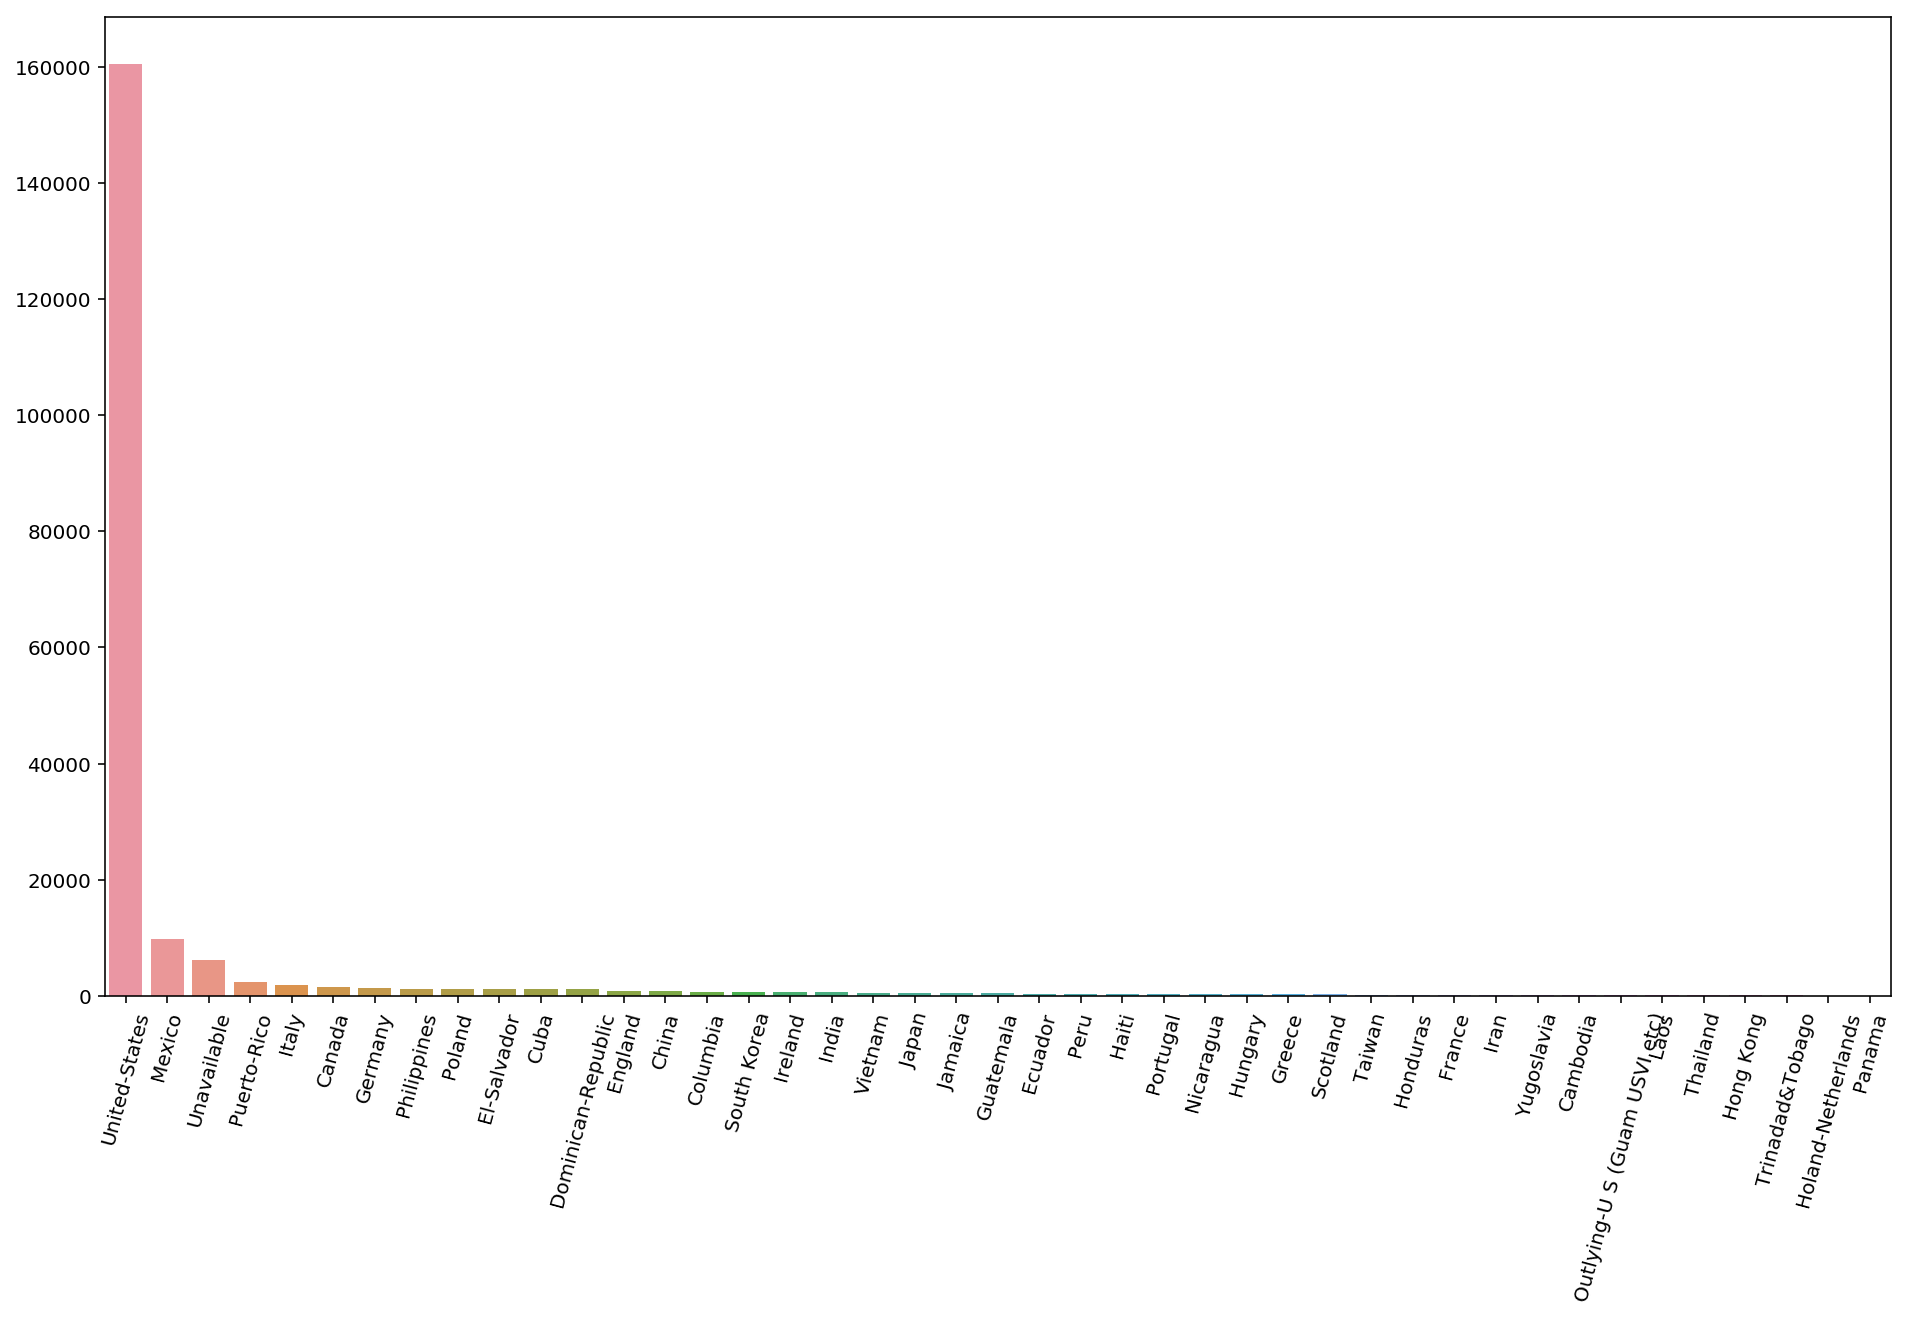

In [28]:
create_countplot('BirthCountryMother','','','')

{'United-States': 176989, 'Mexico': 5767, 'Unavailable': 3393, 'Puerto-Rico': 1400, 'Germany': 851, 'Philippines': 845, 'Cuba': 837, 'Canada': 700, 'Dominican-Republic': 690, 'El-Salvador': 689, 'China': 478, 'South Korea': 471, 'England': 457, 'Columbia': 434, 'Italy': 419, 'India': 408, 'Vietnam': 391, 'Poland': 381, 'Guatemala': 344, 'Japan': 339, 'Jamaica': 320, 'Peru': 268, 'Ecuador': 258, 'Haiti': 228, 'Nicaragua': 218, 'Taiwan': 201, 'Portugal': 174, 'Iran': 157, 'Greece': 147, 'Honduras': 144, 'Ireland': 135, 'France': 121, 'Outlying-U S (Guam USVI etc)': 119, 'Thailand': 113, 'Laos': 105, 'Hong Kong': 100, 'Cambodia': 95, 'Hungary': 79, 'Scotland': 75, 'Yugoslavia': 66, 'Trinadad&Tobago': 66, 'Panama': 28, 'Holand-Netherlands': 23}


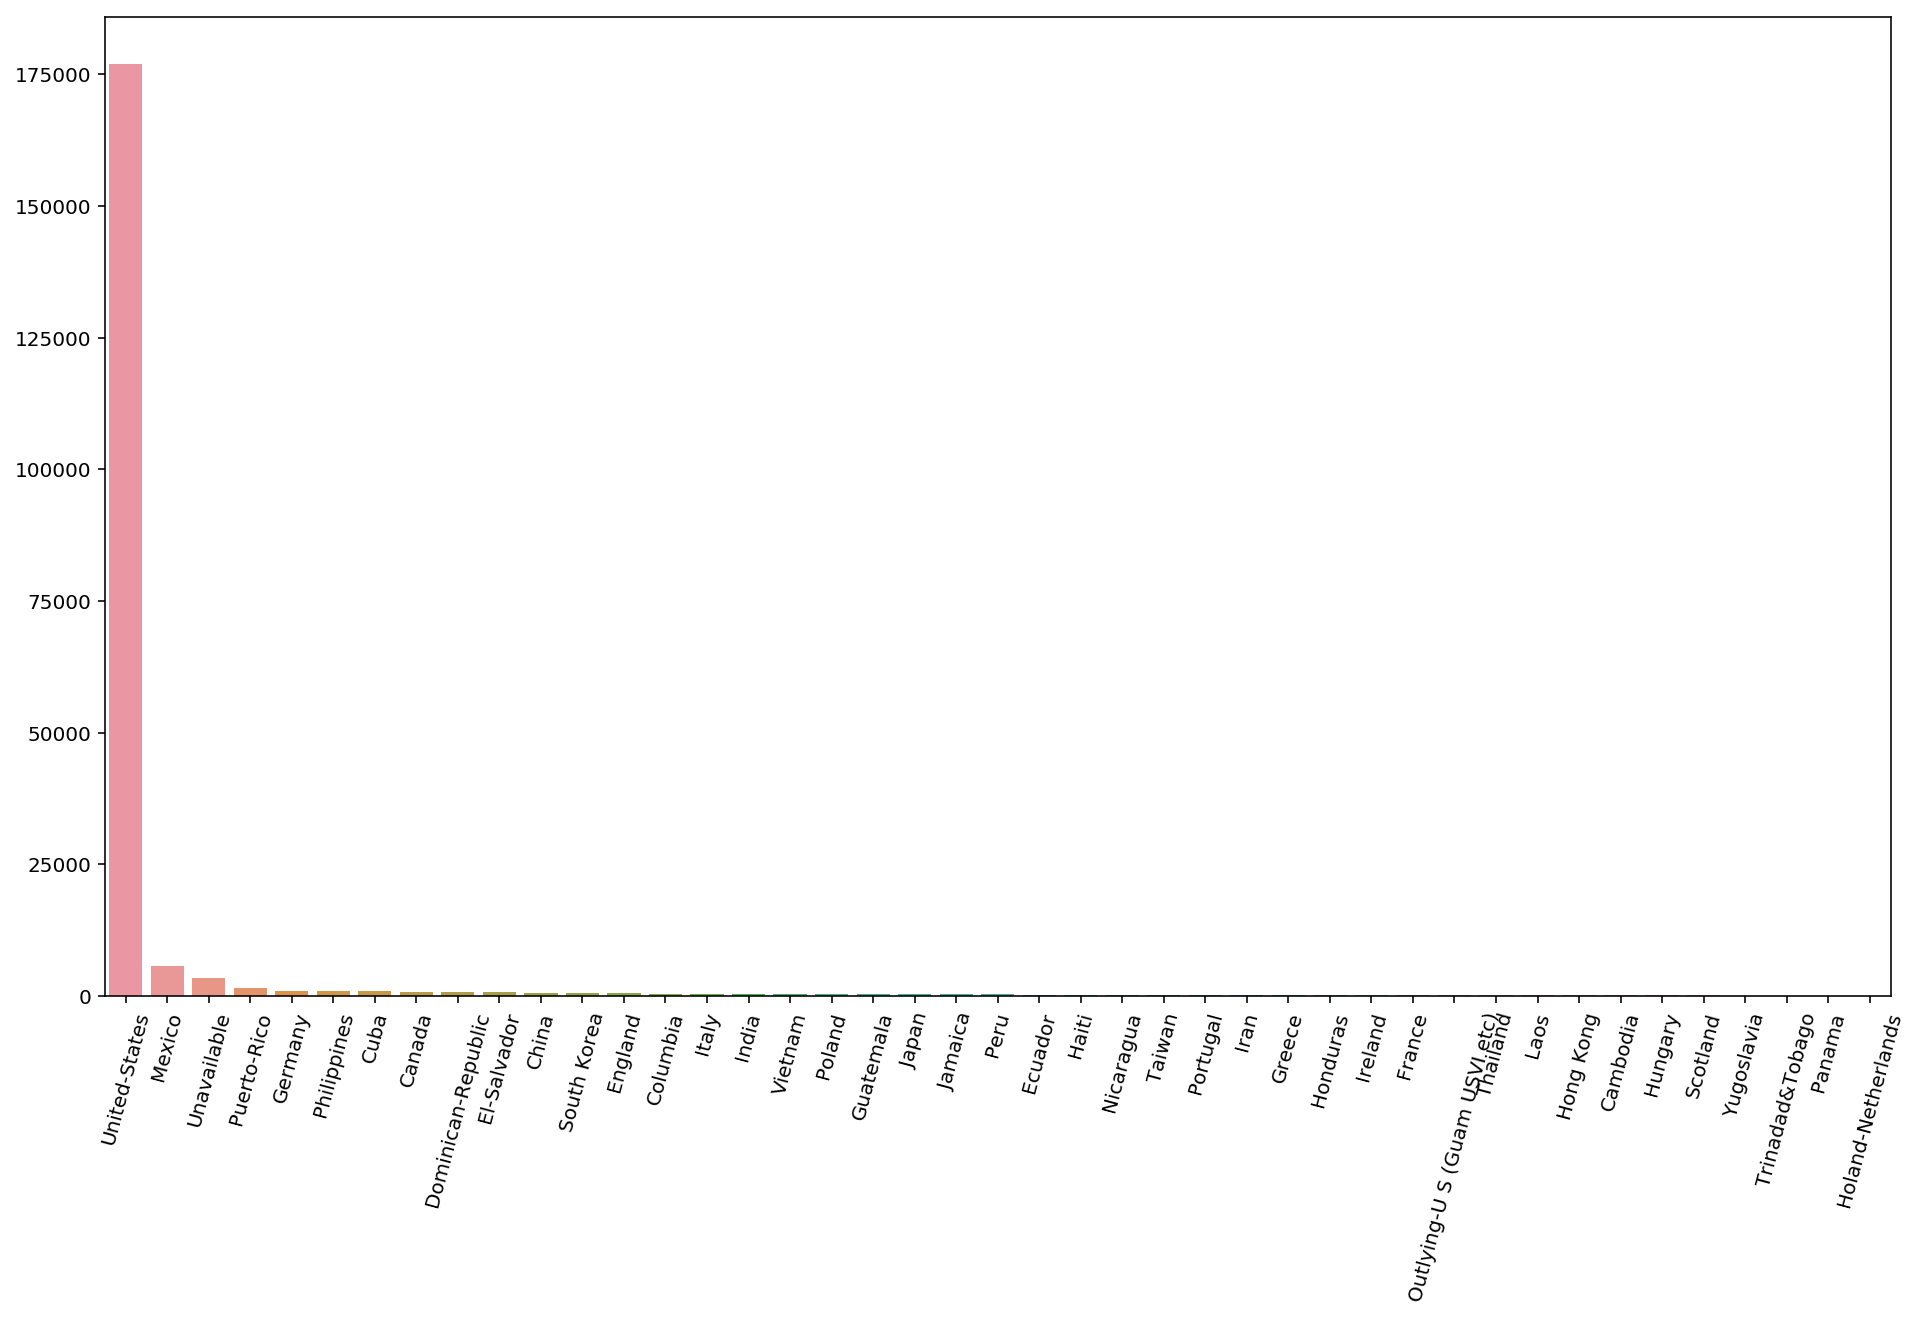

In [29]:
create_countplot('BirthCountrySelf','','','')

{'Native- Born in the United States': 176992, 'Foreign born- Not a citizen of U S ': 13401, 'Foreign born- U S citizen by naturalization': 5855, 'Native- Born abroad of American Parent(s)': 1756, 'Native- Born in Puerto Rico or U S Outlying': 1519}


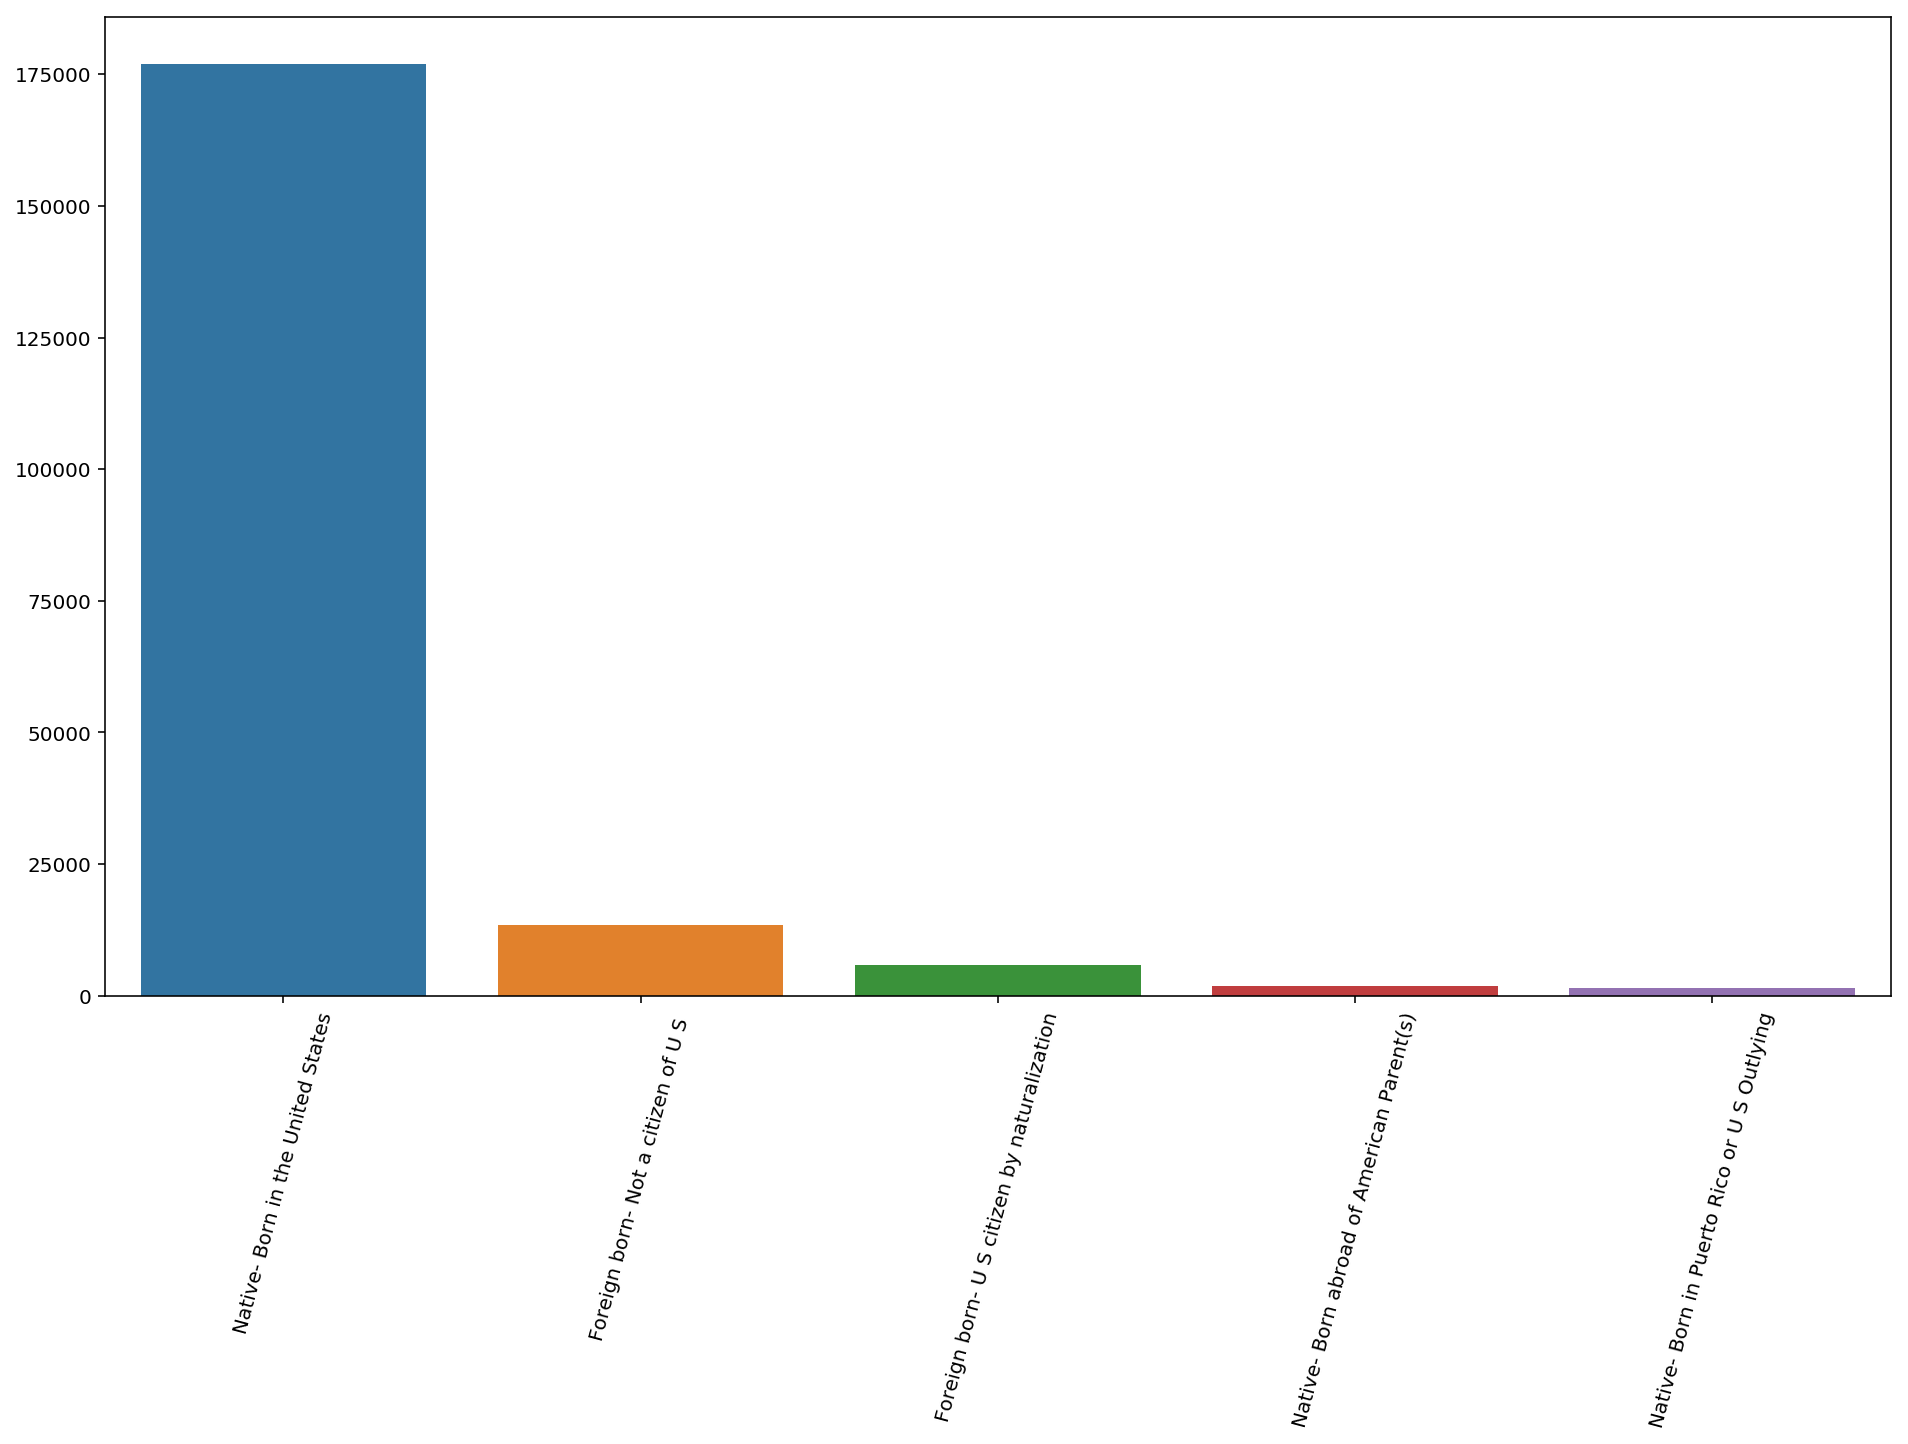

In [30]:
create_countplot('Citizenship','','','')

{'Not in universe': 197539, 'No': 1593, 'Yes': 391}


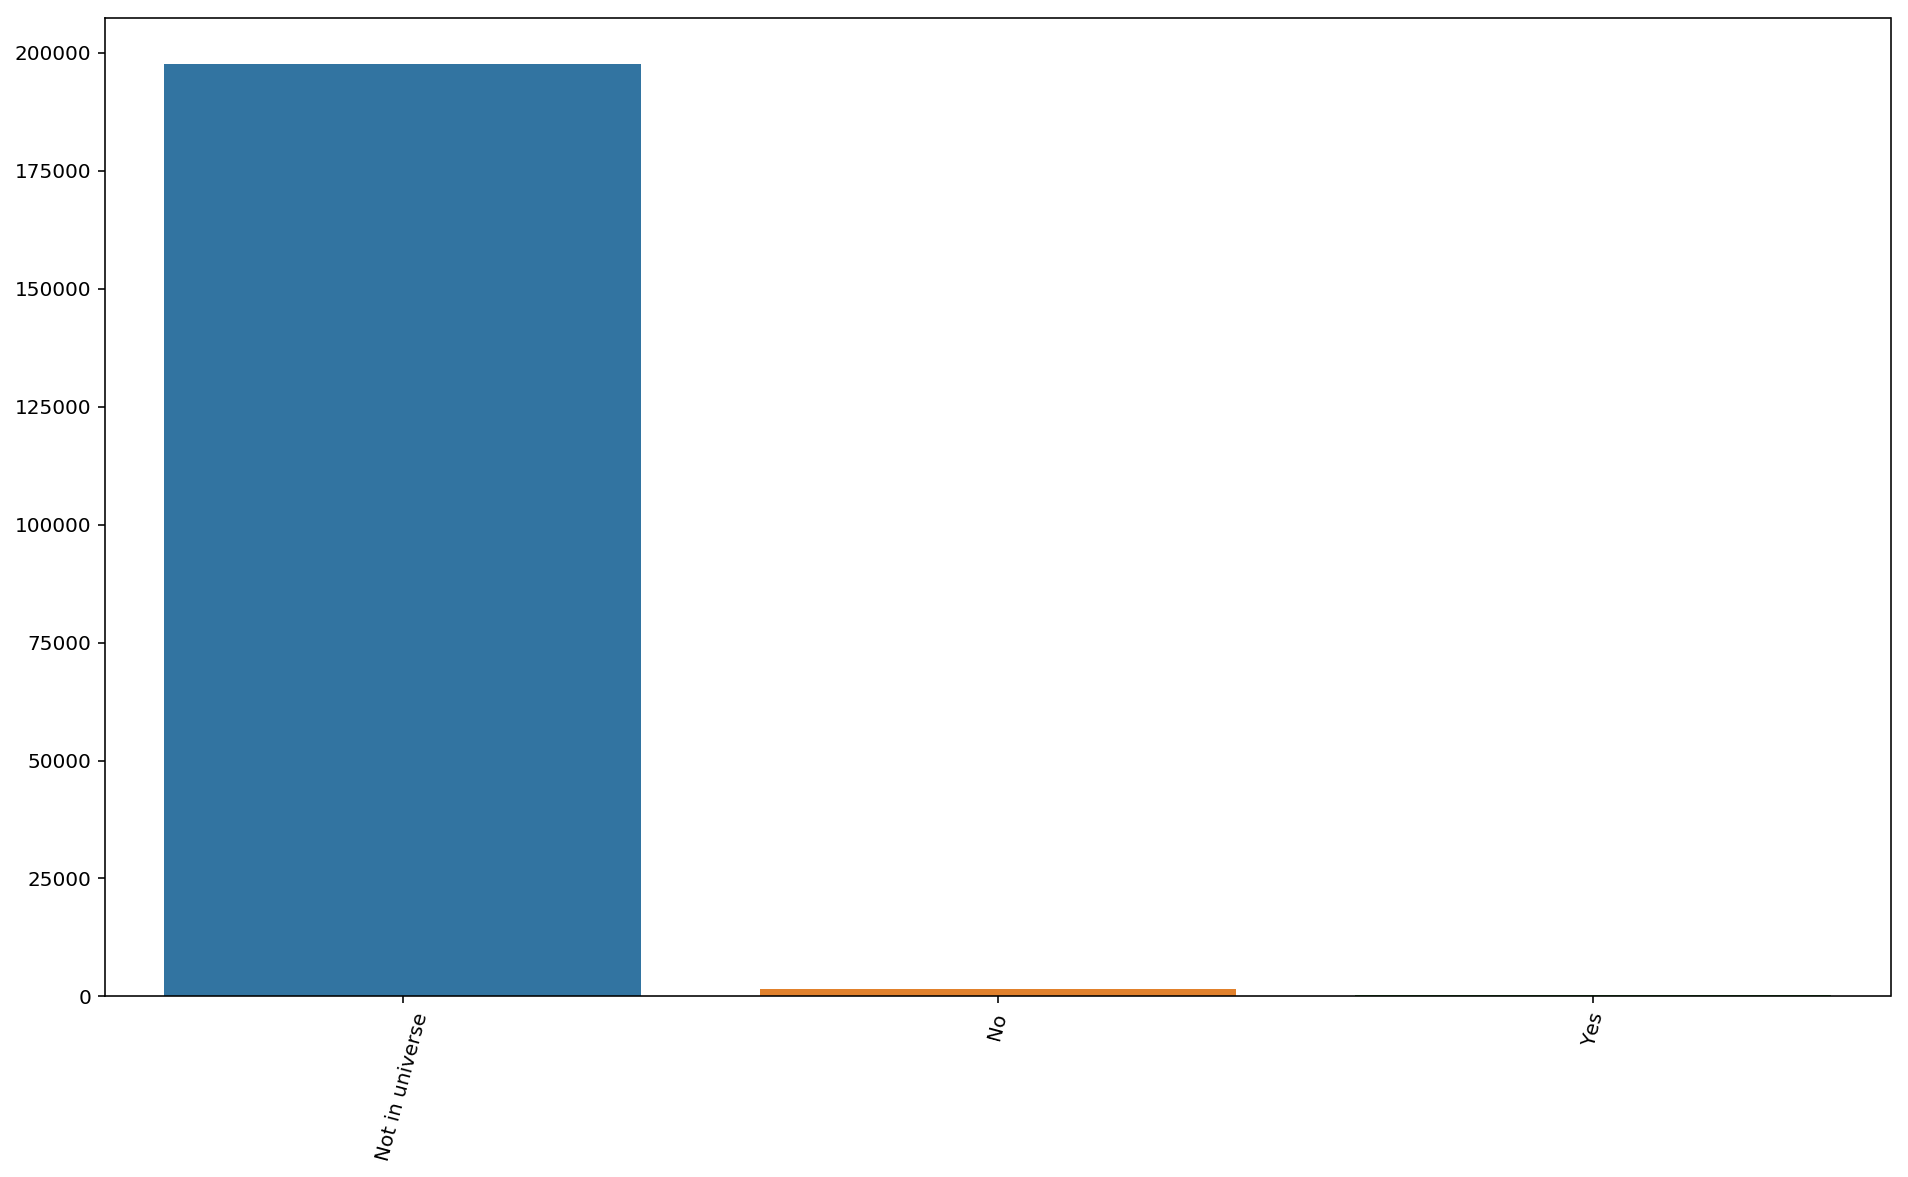

In [31]:
create_countplot('VeteranQA','','','')

{94: 99827, 95: 99696}


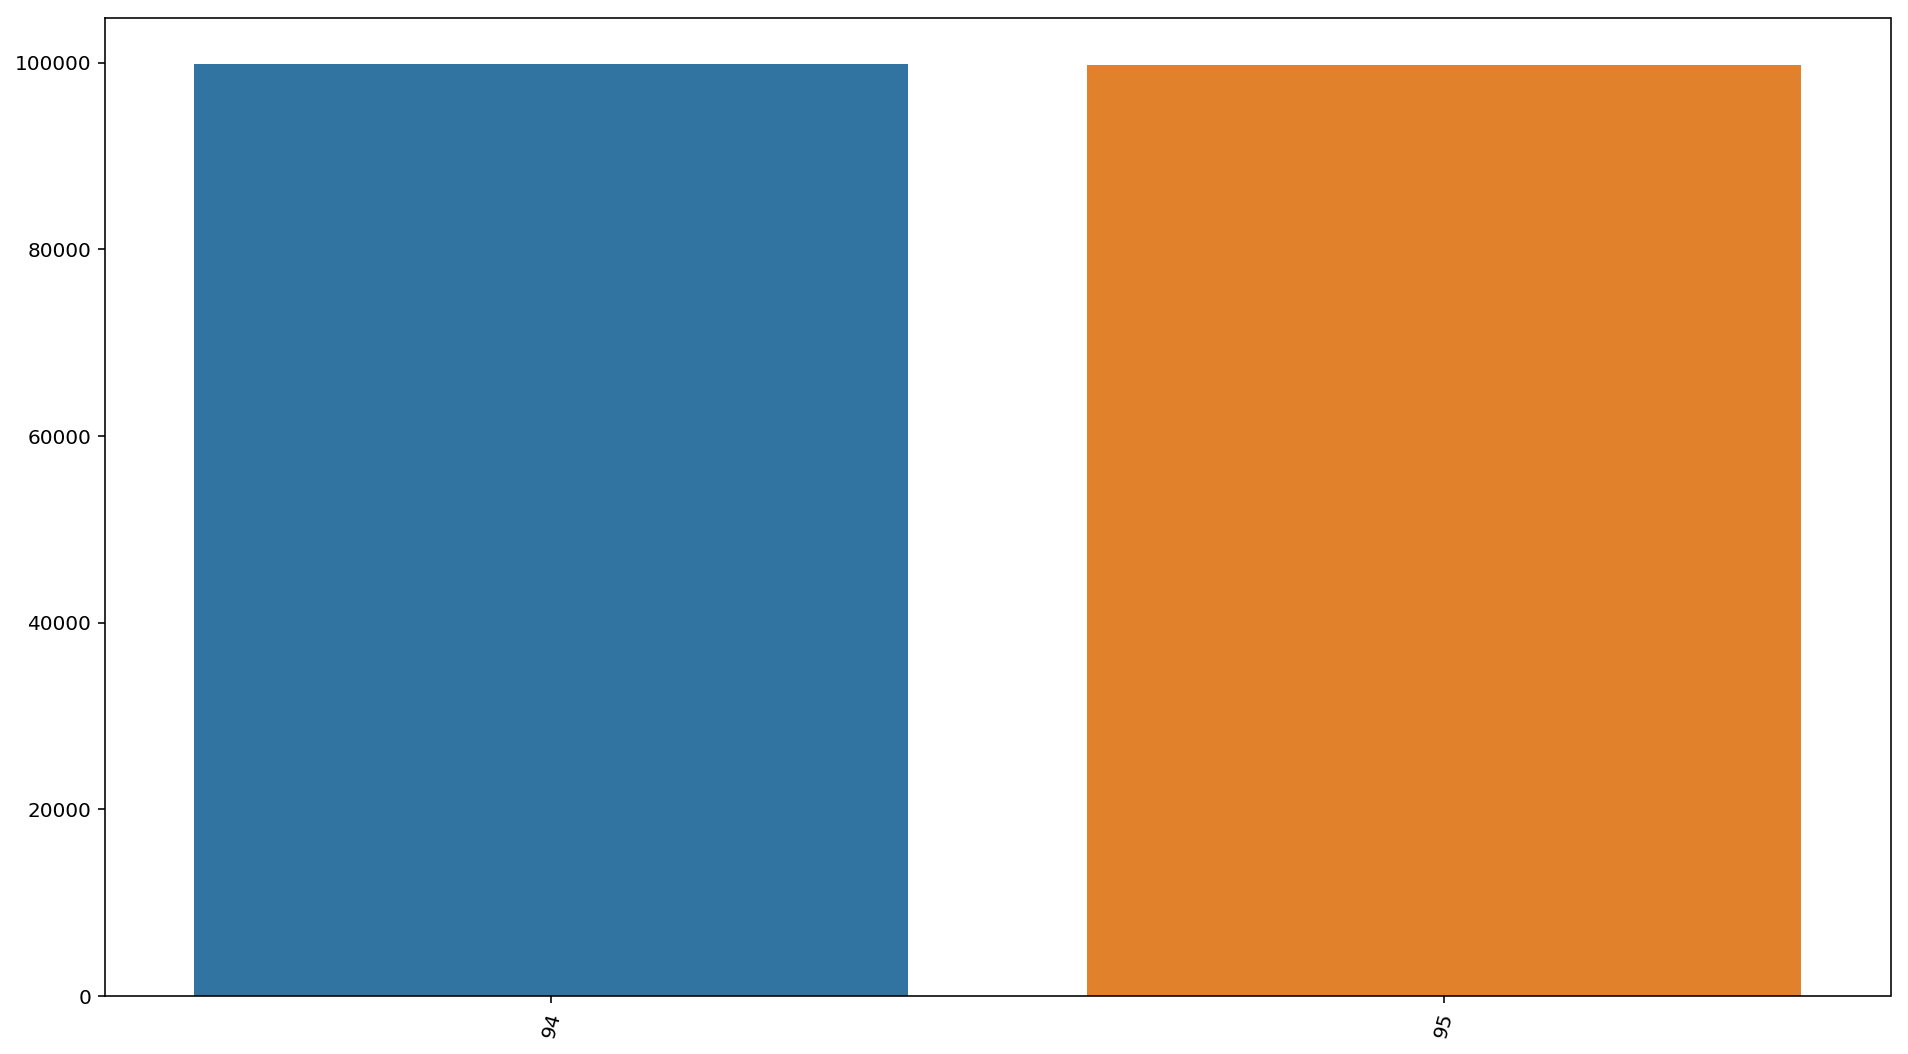

In [32]:
create_countplot('Year','','','')

{0: 187141, 1: 12382}


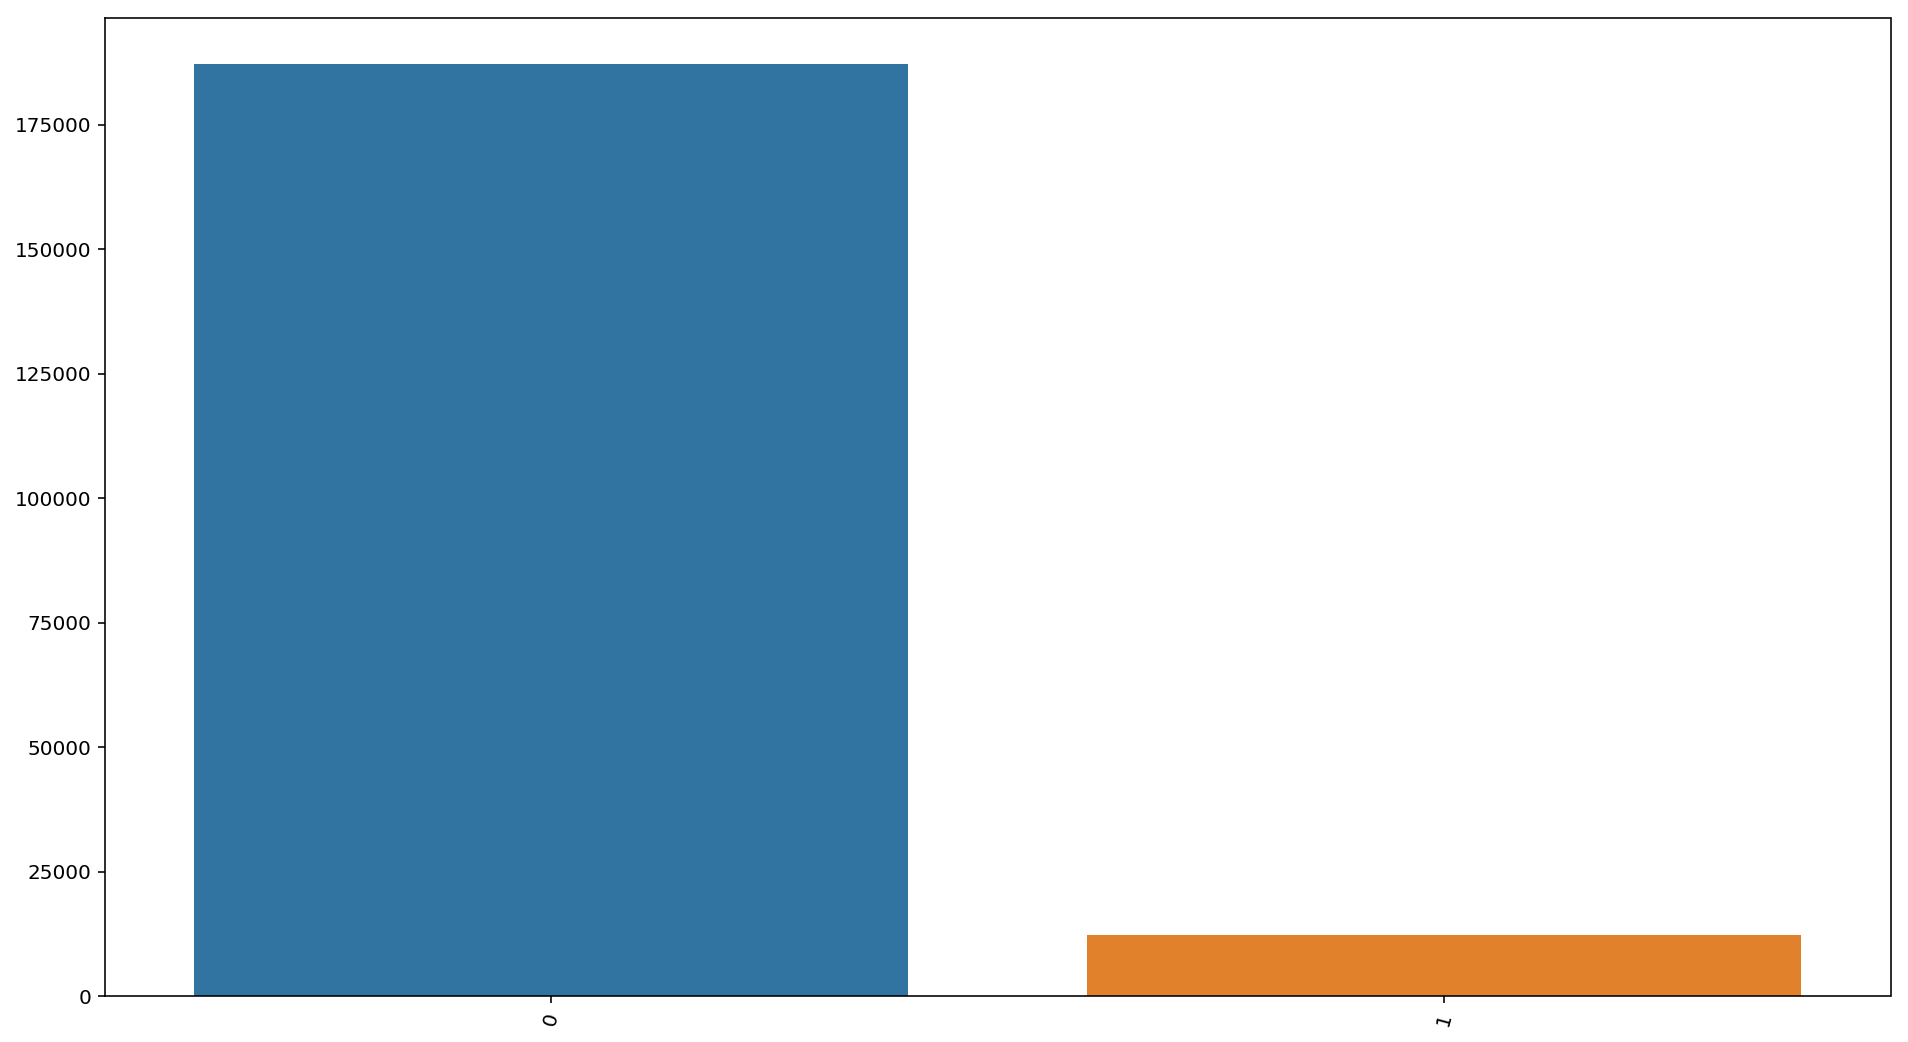

In [33]:
create_countplot('Income','','','')

---